# Biking day dataest

# Question 1
Plot a heatmap of Pearson correlation matrix of dataset columns. Report which features have the highest absolute correlation with the target variable and what that implies.

In [285]:
import numpy as np
import pandas as pd#calculate pearson coefficient matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder

In [286]:
#load dataset
data_day=pd.read_csv('day.csv')
day_array=np.array(data_day)
print(np.array(data_day)[1])
#the second column is in string format

[2 '2011-01-02' 1 0 1 0 0 0 2 0.363478 0.35373899999999997 0.696087
 0.24853899999999998 131 670 801]


In [287]:
#convert the second column into numeric format
for i in range(len(day_array)):
    day_array[i,1]=int(day_array[i,1].replace('-',''))

In [288]:
pearson_matrix=np.corrcoef(day_array.astype(float),rowvar=False)
print(pearson_matrix,end='')
kk=pd.DataFrame(pearson_matrix)
print(kk)

[[ 1.00000000e+00  8.98347675e-01  4.12224179e-01  8.66025404e-01
   4.96701889e-01  1.61446324e-02 -1.61791357e-05 -4.33653693e-03
  -2.14772053e-02  1.50580302e-01  1.52638238e-01  1.63747132e-02
  -1.12619556e-01  2.75255212e-01  6.59622868e-01  6.28830272e-01]
 [ 8.98347675e-01  1.00000000e+00  5.53909130e-02  9.97625373e-01
   6.70632120e-02  9.23857531e-03 -4.79462593e-03 -2.39687278e-03
  -4.56622450e-02  6.26967876e-02  6.16915435e-02 -9.50309269e-02
  -2.60359781e-02  2.56428922e-01  6.13068142e-01  5.84661701e-01]
 [ 4.12224179e-01  5.53909130e-02  1.00000000e+00 -1.84434256e-03
   8.31440114e-01 -1.05366587e-02 -3.07988134e-03  1.24849632e-02
   1.92110281e-02  3.34314856e-01  3.42875613e-01  2.05444765e-01
  -2.29046337e-01  2.10399165e-01  4.11623051e-01  4.06100371e-01]
 [ 8.66025404e-01  9.97625373e-01 -1.84434256e-03  1.00000000e+00
  -1.79243384e-03  7.95431080e-03 -5.46076519e-03 -2.01262119e-03
  -4.87265412e-02  4.76035719e-02  4.61061485e-02 -1.10651045e-01
  -1.18

In [289]:
#print out feature names\
feature_name=[]
for col in data_day.columns:
    print(col)
    feature_name.append(col)

instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [290]:
print('For casual target variable, the pearson correlation coefficients are')
print(np.abs(pearson_matrix[:,13]))
print(np.argsort(np.abs(pearson_matrix[:,13])))
print('For registered target variable, the pearson correlation coefficients are')
print(np.abs(pearson_matrix[:,14]))
print(np.argsort(np.abs(pearson_matrix[:,14])))
print('For cnt target variable, the pearson correlation coefficients are')
print(np.abs(pearson_matrix[:,15]))
print(np.argsort(np.abs(pearson_matrix[:,15])))

For casual target variable, the pearson correlation coefficients are
[0.27525521 0.25642892 0.21039916 0.24854566 0.12300589 0.0542742
 0.05992264 0.51804419 0.247353   0.54328466 0.54386369 0.07700788
 0.16761335 1.         0.39528245 0.67280443]
[ 5  6 11  4 12  2  8  3  1  0 14  7  9 10 15 13]
For registered target variable, the pearson correlation coefficients are
[0.65962287 0.61306814 0.41162305 0.59424817 0.29348783 0.10874486
 0.05736744 0.30390712 0.26038771 0.54001197 0.54419176 0.0910886
 0.21744898 0.39528245 1.         0.94551692]
[ 6 11  5 12  8  4  7 13  2  9 10  3  1  0 15 14]
For cnt target variable, the pearson correlation coefficients are
[0.62883027 0.5846617  0.40610037 0.56670971 0.27997711 0.06834772
 0.06744341 0.06115606 0.29739124 0.62749401 0.6310657  0.10065856
 0.234545   0.67280443 0.94551692 1.        ]
[ 7  6  5 11 12  4  8  2  3  1  9  0 10 13 14 15]


For target variable "casual" the highest correlated feature is "atemp"
For target variable "registered" the highest correlated feature is "instant"
For target variable "cnt" the highest correlated feature is "atemp"

# Question 2
Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness? 

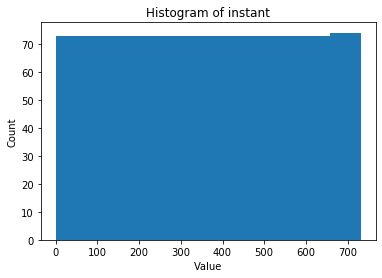

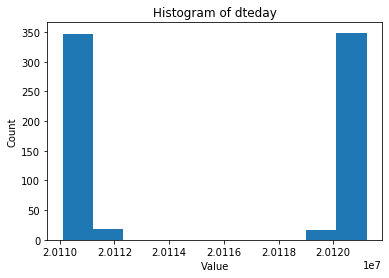

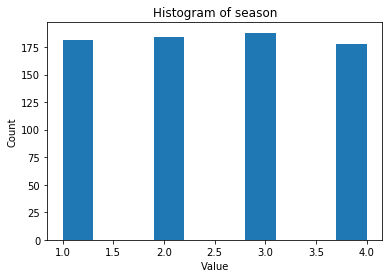

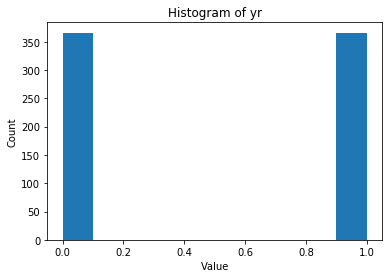

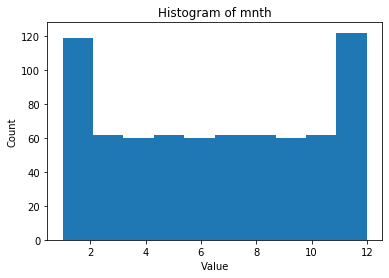

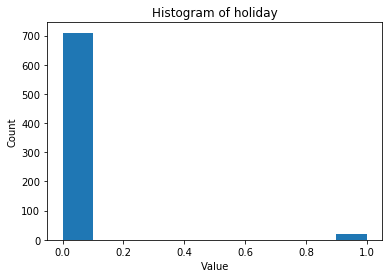

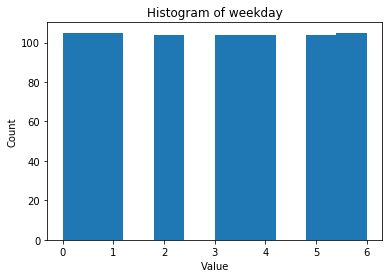

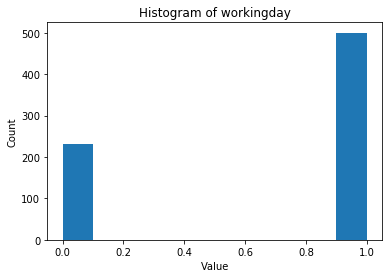

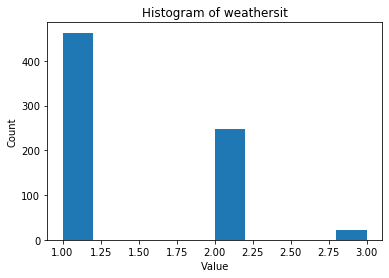

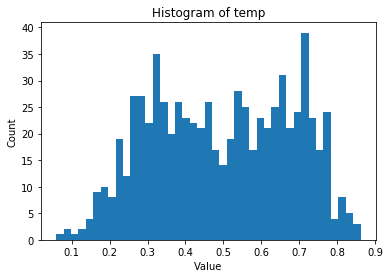

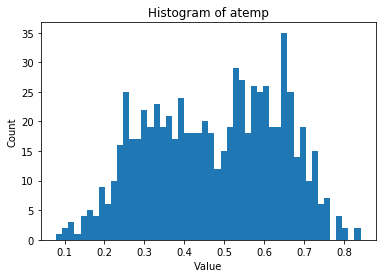

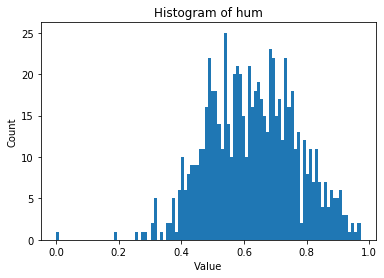

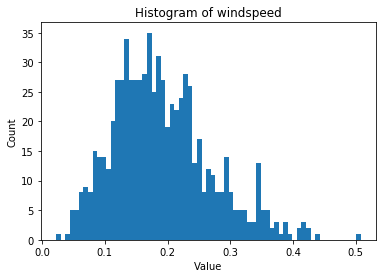

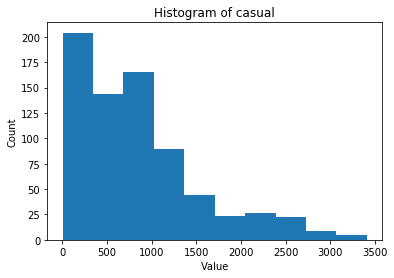

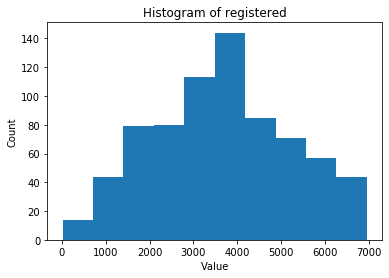

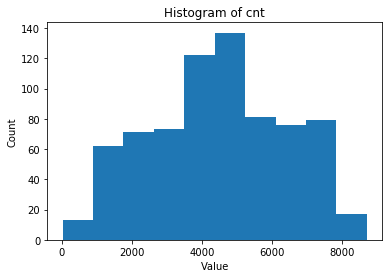

<Figure size 432x288 with 0 Axes>

In [291]:
bins=[0,0,0,0,0,0,0,0,0,41,50,100,67,0,0,0]
index=[9,10,11,12]
for i in range(16):#temp is 10, atemp is 11, hun is 12, windspeed is 13
    
    if i in [9,10,11,12]:
        plt.hist(day_array[:,i],bins=bins[i])
        plt.title('Histogram of {}'.format(feature_name[i]))
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.figure()
    else:
        plt.hist(day_array[:,i])
        plt.title('Histogram of {}'.format(feature_name[i]))
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.figure()

<Figure size 432x288 with 0 Axes>

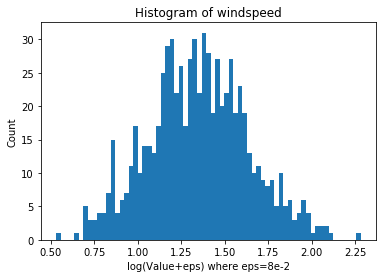

<Figure size 432x288 with 0 Axes>

In [292]:
numer_feature=[9,10,11,12]
bins=[0,0,0,0,0,0,0,0,0,41,50,100,67,0,0,0]
eps=8e-2
k=abs(np.log((day_array[:,12]+eps).astype(float)))
plt.hist(k,bins=67)
plt.title('Histogram of {}'.format(feature_name[12]))
plt.xlabel('log(Value+eps) where eps=8e-2')
plt.ylabel('Count')
plt.figure()

<Figure size 432x288 with 0 Axes>

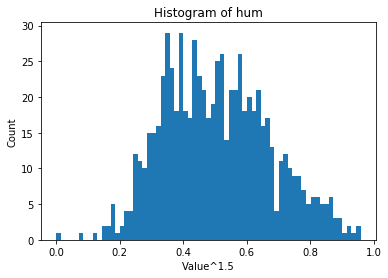

<Figure size 432x288 with 0 Axes>

In [293]:
k=(day_array[:,11]**(1.5))
plt.hist(k,bins=67)
plt.title('Histogram of {}'.format(feature_name[11]))
plt.xlabel('Value^1.5')
plt.ylabel('Count')
plt.figure()

If the distribution of feature has high skewness,the best option is to performa a log transform of the skew data.

# Question 4
 For bike sharing dataset, plot the count number per day for a few months. Can you identify any repeating patterns in every month? 

In [294]:
biking_data= data_day.pivot(index='instant', columns='mnth', values='cnt').fillna(0)

In [295]:
print(biking_data)

mnth         1    2    3    4    5    6    7    8    9    10   11      12
instant                                                                  
1         985.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0
2         801.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0
3        1349.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0
4        1562.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0
5        1600.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...
727         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2114.0
728         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3095.0
729         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1341.0
730         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1796.0
731         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2729.0

[731 rows x 12 columns]


[[ 985.    0.    0. ...    0.    0.    0.]
 [ 801.    0.    0. ...    0.    0.    0.]
 [1349.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0. 1341.]
 [   0.    0.    0. ...    0.    0. 1796.]
 [   0.    0.    0. ...    0.    0. 2729.]]


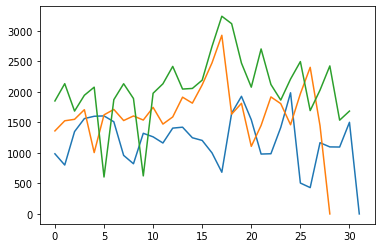

In [296]:
biking_array=np.array(biking_data)
print(biking_array)
plt.plot(biking_array[0:32,0])
plt.plot(biking_array[31:60,1])
plt.plot(biking_array[59:90,2])

Yes, there is repeation every month

# Question 6
Explain the scalar encoding method and one-hot coding method?

Answer:
For scalar enoding, we only need one numerical feature for one categorical feature. Therefore, no additional feature will be added, the feature map will remain its dimensionality. However, sccalar encoding will implicitly introduce an order. For example, dog, cat, and horse are assigned 0, 1 and 2. However, it can be implied by the model that the average of dog and horse is cat which meakes no sense. Therefore, this ordinality will contribute unnecessary information to the model training.
For one hot encoding, it can prevent the disadvantage of scalar encoding, which means, all different categories in one feature will be assign a new column and be assigned 1 or 0. However, it will be easier for the feature to be fall into high dimensionality curse. If a category feature has a a great amount of different feature, then the one hot encoder will introduce lots of additional feature columns than before.

# Question 7
Standardize feature columns and prepare them for training

In [297]:
#bike dataset
#separate labels and feature
print(day_array.shape)
day_feature=day_array[:,:13]
day_feature[:,12]=abs(np.log((day_feature[:,12]+eps).astype(float)))#windspeed log
day_feature[:,11]=(day_feature[:,11]**(1.5))#hum exponential
#exclude instance, date
day_feature=day_feature[:,2:]#season, yr, mnth, holiday, weekday, workingday, weather,temp,atemp,hum,windspeed
print(day_feature.shape)
day_label=day_array[:,15]
day_label_noscale=day_array[:,15]# the target variable is cnt, discard the rest two
print(day_label.shape)

(731, 16)
(731, 11)
(731,)


In [298]:
#standarize feature map
day_feature_scaled=scale(day_feature)

In [299]:
#one hot encoding
print(day_feature_scaled.shape)
#performe one hot encoding for categorical data
day_feature_scaled_categorical=day_feature_scaled[:,[0,1,2,3,4,5,6]]
enc=OneHotEncoder()
day_feature_onehot_part=enc.fit_transform(day_feature_scaled_categorical)

print(type(day_feature_onehot_part))
k=day_feature_onehot_part.todense()
print(type(k))
print(k.shape)
day_feature_scaled_num=day_feature_scaled[:,[7,8,9,10]]
print(day_feature_scaled_num.shape)
day_feature_onehot=np.hstack((k,day_feature_scaled_num))
print(day_feature_onehot.shape)

(731, 11)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
(731, 32)
(731, 4)
(731, 36)


1.5552234982437213e-16
1.0
0.0
1.0
3.888058745609303e-17
1.0
4.2525642530101755e-17
0.9999999999999998
2.885668600256905e-17
0.9999999999999998
-1.075291246832573e-16
1.0
-9.720146864023258e-18
1.0
-4.374066088810466e-16
1.0
9.720146864023258e-18
1.0
-4.0824616828897685e-16
1.0
-1.166417623682791e-16
0.9999999999999999


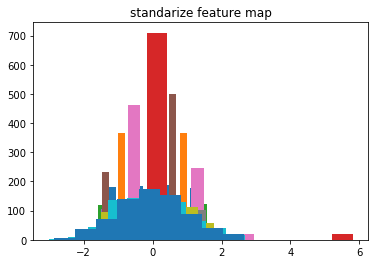

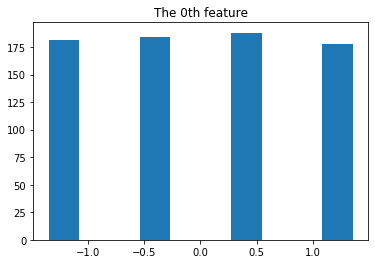

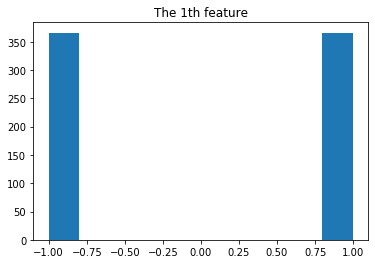

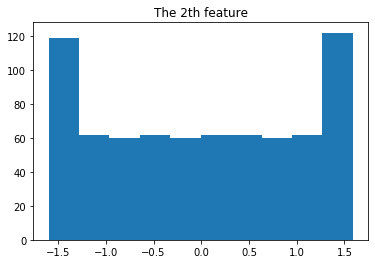

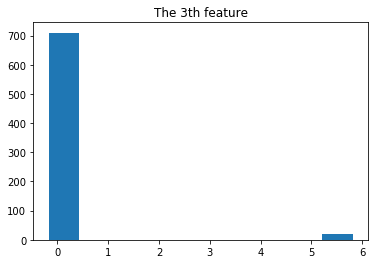

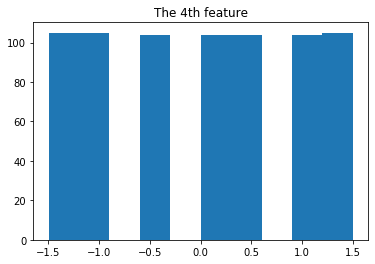

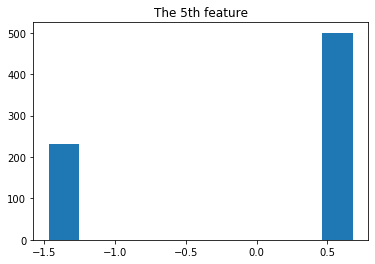

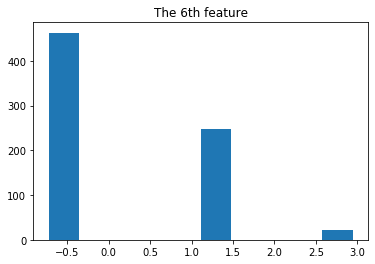

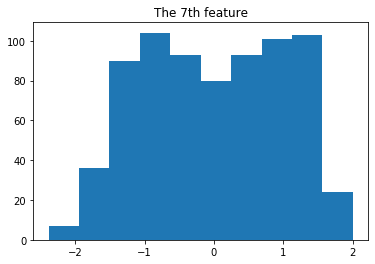

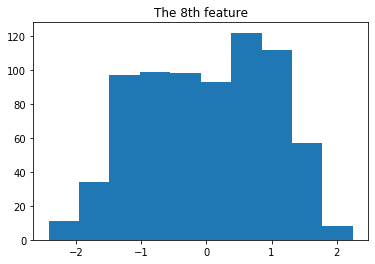

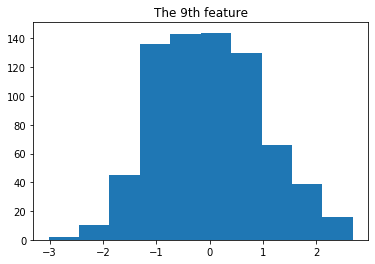

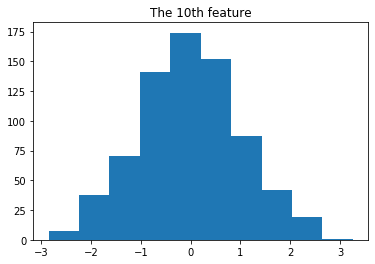

<Figure size 432x288 with 0 Axes>

In [300]:
#check mean and distribution
for i in range(day_feature_scaled.shape[1]):
    print(np.mean(day_feature_scaled[:,i]))
    print(np.std(day_feature_scaled[:,i]))
    plt.hist(day_feature_scaled[:,i])
    plt.title('standarize feature map')
plt.figure()

    
for i in range(11):
    plt.hist(day_feature_scaled[:,i])
    plt.title('The %ith feature' %i)
    plt.figure()

# Question 8
Feature Selection

In [301]:
#only choose feature with mutual information greater than 0.05
day_label=scale(day_label)
mutual_info_bike=mutual_info_regression(day_feature_scaled,day_label)
print('The mutual info for bike dataset is')
print(mutual_info_bike)
day_feature_red=[]
day_feature_red_withlabel=[]
for i in range(day_feature_scaled.shape[1]):
    if mutual_info_bike[i]>=0.05:
        day_feature_red.append(day_feature_scaled[:,i])
        day_feature_red_withlabel.append(day_feature_scaled[:,i])
day_feature_red=np.transpose(np.array(day_feature_red))
day_feature_red_withlabel.append(scale(day_label))
day_feature_red_withlabel=np.transpose(np.array(day_feature_red_withlabel))
print(day_feature_red.shape)

The mutual info for bike dataset is
[0.21716343 0.2777468  0.37093615 0.01151266 0.04506079 0.02328186
 0.06542977 0.38808814 0.46427527 0.04609451 0.0654731 ]
(731, 7)


In [302]:
#one hot encoding
day_label=scale(day_label)
mutual_info_bike=mutual_info_regression(day_feature_onehot,day_label)
print('The mutual info for bike dataset is')
print(mutual_info_bike)
day_feature_red_onehot=[]
day_feature_red_withlabel_onehot=[]
for i in range(day_feature_onehot.shape[1]):
    if mutual_info_bike[i]>=0.05:
        day_feature_red_onehot.append(day_feature_onehot[:,i])
        day_feature_red_withlabel_onehot.append(day_feature_onehot[:,i])
day_feature_red_onehot=np.transpose(np.array(day_feature_red_onehot)).reshape(731,9)
print(day_feature_red_onehot.shape)
day_feature_red_withlabel_onehot.append(scale(day_label).reshape([731,1]))
day_feature_red_withlabel_onehot=np.hstack((day_feature_red_onehot,day_label.reshape(731,1)))

print(day_feature_red_withlabel_onehot.shape)

The mutual info for bike dataset is
[0.19377453 0.007343   0.06983671 0.03329333 0.27605533 0.27605533
 0.10711333 0.0639375  0.04550911 0.00797766 0.02335191 0.02983374
 0.02195606 0.02982288 0.01773487 0.0013106  0.04105678 0.03637184
 0.01152305 0.01152305 0.         0.00463176 0.         0.02450506
 0.01943644 0.0037877  0.02779058 0.02647462 0.02647462 0.0443449
 0.0208868  0.04350507 0.38907168 0.46432142 0.04581958 0.06535886]
(731, 9)
(731, 10)


In [303]:
#without scaling
mutual_info_bike=mutual_info_regression(day_feature,day_label_noscale)
print('The mutual info for bike dataset is')
print(mutual_info_bike)
day_feature_red_noscale=[]
day_feature_red_withlabel_noscale=[]
for i in range(day_feature.shape[1]):
    if mutual_info_bike[i]>=0.05:
        day_feature_red_noscale.append(day_feature[:,i])
        day_feature_red_withlabel_noscale.append(day_feature[:,i])
day_feature_red_noscale=np.transpose(np.array(day_feature_red_noscale))
day_feature_red_withlabel_noscale.append(day_label)
print(np.shape(np.array(day_feature_red_withlabel_noscale)))
day_feature_red_withlabel_noscale=np.transpose(np.array(day_feature_red_withlabel_noscale))
print(day_feature_red_noscale.shape)

The mutual info for bike dataset is
[0.21669678 0.27470814 0.37787724 0.01147239 0.0453033  0.02096995
 0.06532581 0.3892932  0.46471489 0.04623764 0.06509315]
(8, 731)
(731, 7)


# Linear Regression

# Question 9
 Explain how each regularization scheme aﬀects the learned hypotheses.

In [304]:
#Linear Regression without regularization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [305]:
def evaluation(X_train):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        LR=LinearRegression()
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=LR.fit(train_data_feature,train_data_label)
        pred_train=LR.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=LR.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True for Linear Regressor without Reg')
    plt.figure()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

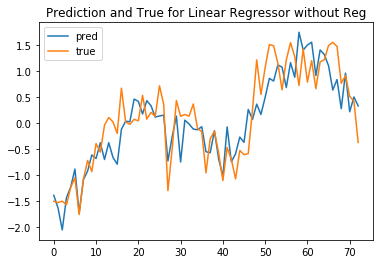

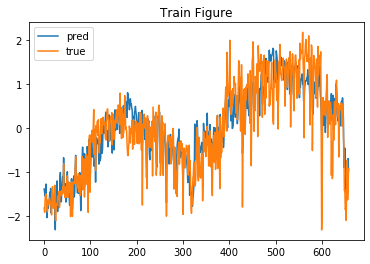

The average RMSE for training is 0.4619148840301463
The average RMSE for validation is 0.46446431014074746


In [306]:
#scalar encoding with scaling
[RMSE_train,RMSE_val]=evaluation(day_feature_red_withlabel)

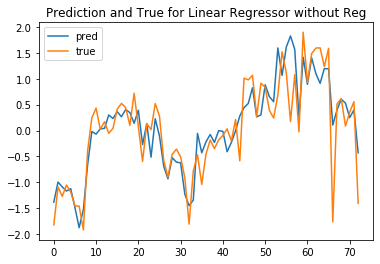

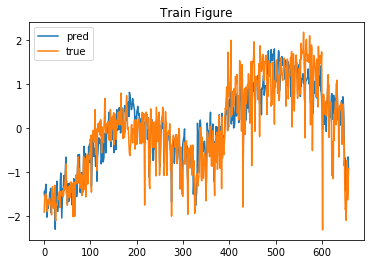

The average RMSE for training is 0.46185047796957956
The average RMSE for validation is 0.4687741713541834


In [307]:
#scalar encoding without scaling
[RMSE_train,RMSE_val]=evaluation(day_feature_red_withlabel_noscale)

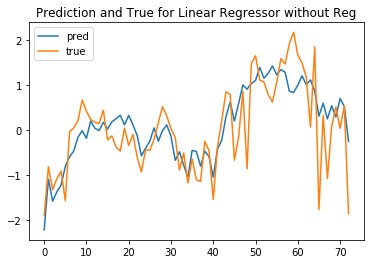

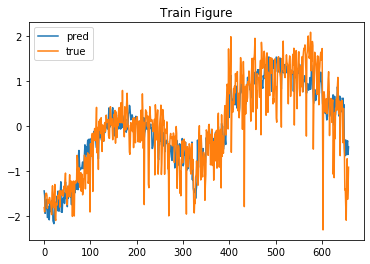

The average RMSE for training is 0.4919257439572323
The average RMSE for validation is 0.4972282926359945


In [308]:
#one hot encoding with scaling
[RMSE_train,RMSE_val]=evaluation(day_feature_red_withlabel_onehot)

In [309]:
#lasso
from sklearn.linear_model import Lasso

In [310]:
def evaluation_lasso(X_train,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        LS=Lasso(alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=LS.fit(train_data_feature,train_data_label)
        pred_train=LS.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        pred_val=LS.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
    RMSE_train_ave=np.mean(RMSE_train)
    RMSE_val_ave=np.mean(RMSE_val)
        #eee=np.sqrt(mean_squared_error(np.random.rand(len(pred_val)),test_data_label))
        #print(eee)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Lasso Regressor with alpha={}'.format(alpha))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When regularization strength is 0


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.5853535956666, tolerance: 0.06703955459356246
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegressio

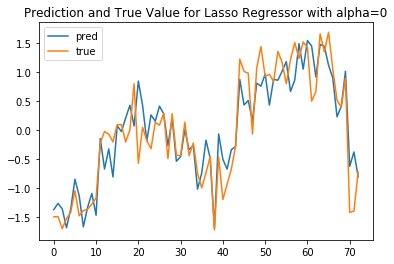

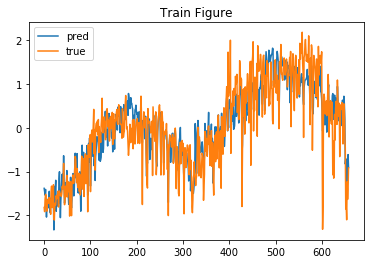

The average RMSE for training is 0.4617677993201748
The average RMSE for validation is 0.4684466700400659
When regularization strength is 0.0001


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2671409270066363, tolerance: 0.06634418696070216
  positive)


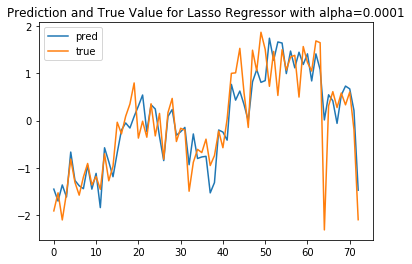

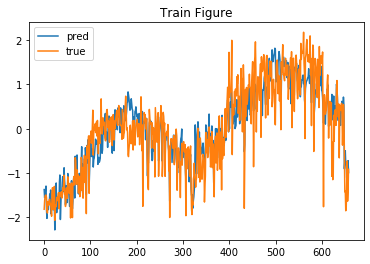

The average RMSE for training is 0.46187101608472575
The average RMSE for validation is 0.46804666815005413
When regularization strength is 0.001


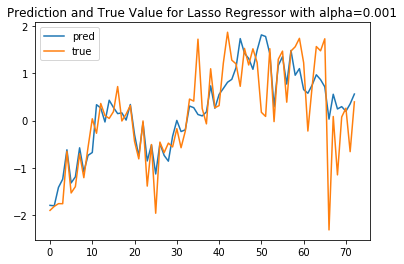

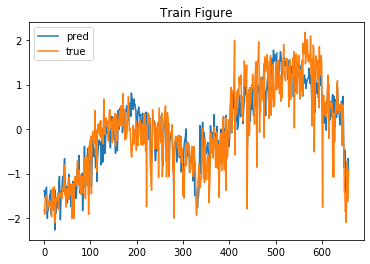

The average RMSE for training is 0.46182628902009515
The average RMSE for validation is 0.46525224790134595
When regularization strength is 0.01


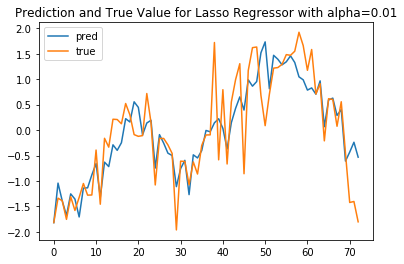

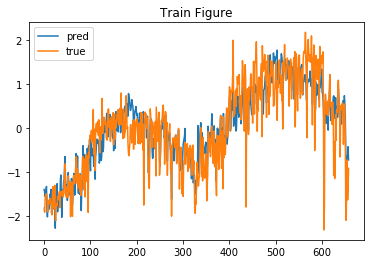

The average RMSE for training is 0.4634328265880418
The average RMSE for validation is 0.4659334902083785
When regularization strength is 0.1


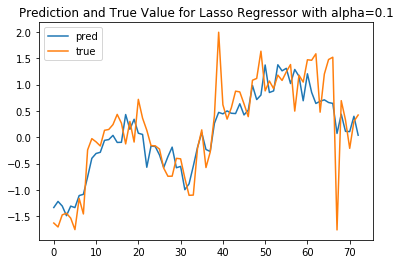

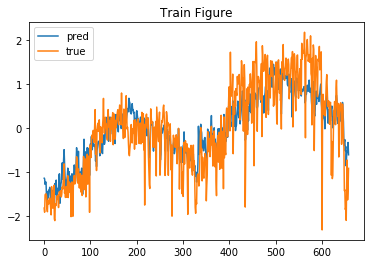

The average RMSE for training is 0.5025893698587601
The average RMSE for validation is 0.5059243482104148
When regularization strength is 1


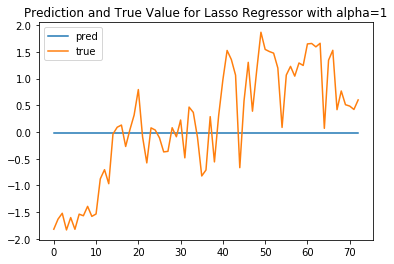

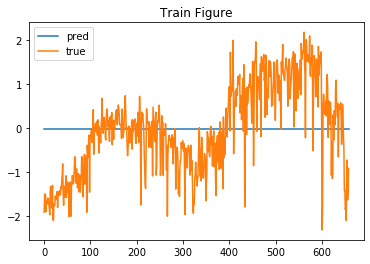

The average RMSE for training is 0.9998751002027791
The average RMSE for validation is 1.0001562342705337
When regularization strength is 10


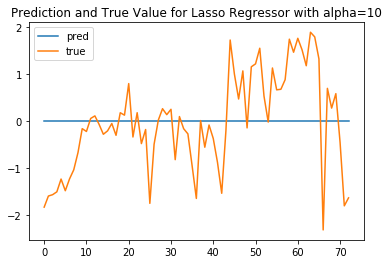

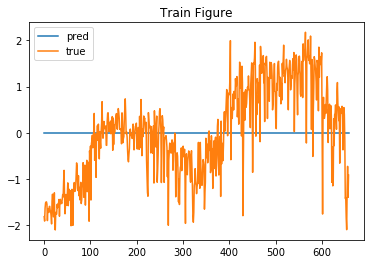

The average RMSE for training is 0.9998549004837534
The average RMSE for validation is 1.0018016483346748
When regularization strength is 100


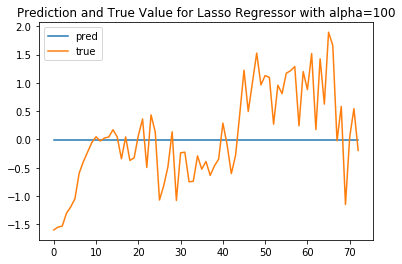

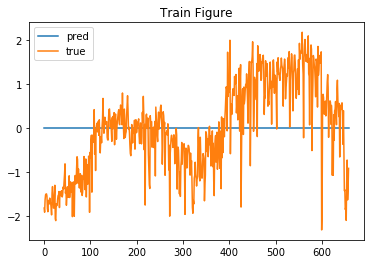

The average RMSE for training is 0.999901779924395
The average RMSE for validation is 0.9983691111636684


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


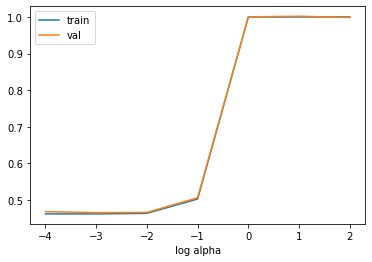

In [311]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_lasso(day_feature_red_withlabel,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.show()

When regularization strength is 0


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.12149422373854, tolerance: 0.06604276273591199
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegressi

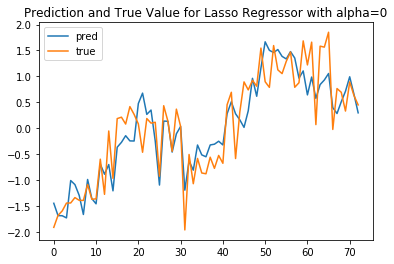

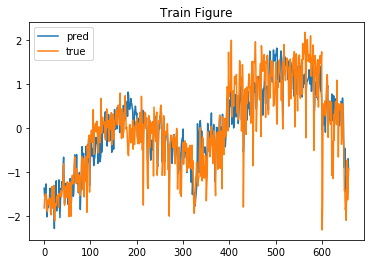

The average RMSE for training is 0.4617708037715431
The average RMSE for validation is 0.4703129610056167
When regularization strength is 0.0001


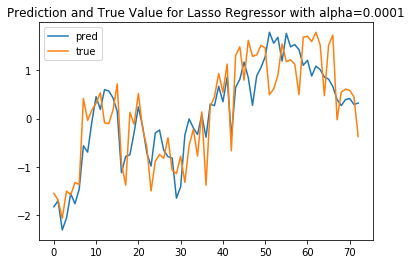

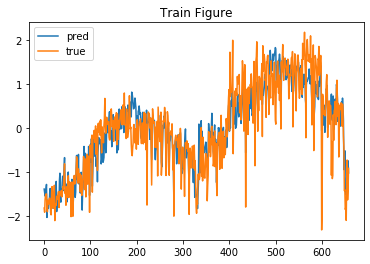

The average RMSE for training is 0.4618130856615553
The average RMSE for validation is 0.46781561472391725
When regularization strength is 0.001


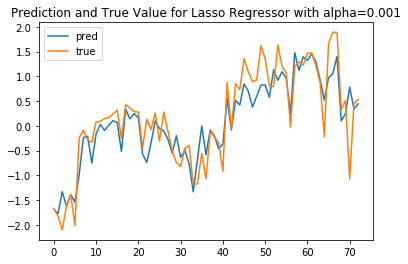

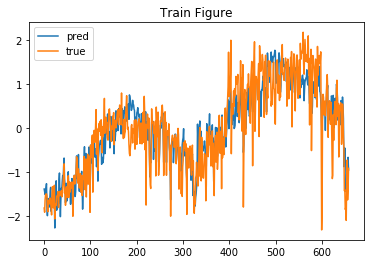

The average RMSE for training is 0.46182047163078843
The average RMSE for validation is 0.4699934869858177
When regularization strength is 0.01


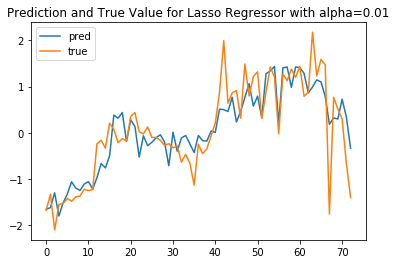

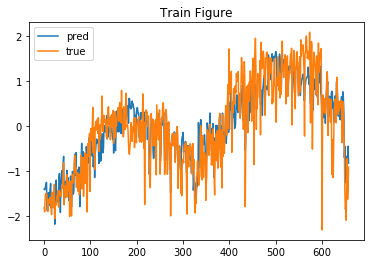

The average RMSE for training is 0.4679514349005979
The average RMSE for validation is 0.47155714895524703
When regularization strength is 0.1


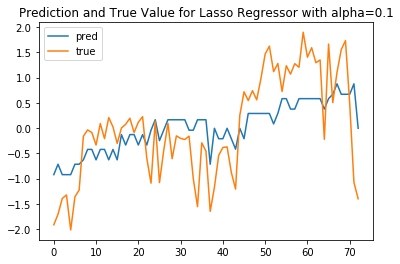

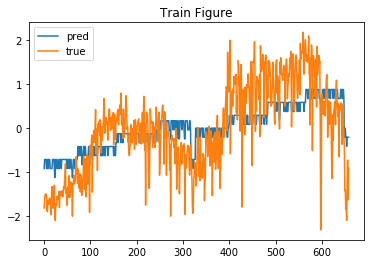

The average RMSE for training is 0.717687772705022
The average RMSE for validation is 0.7219118209006435
When regularization strength is 1


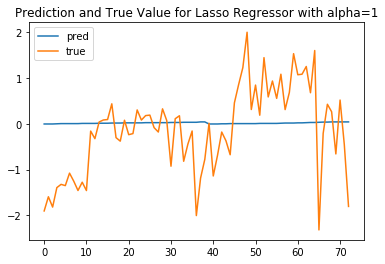

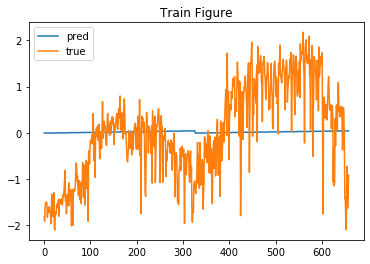

The average RMSE for training is 0.9984723300990691
The average RMSE for validation is 1.0002608884567132
When regularization strength is 10


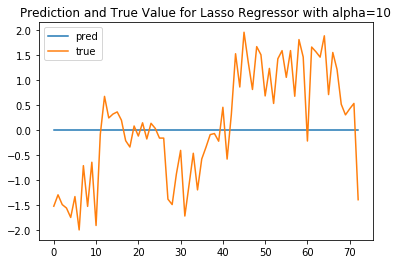

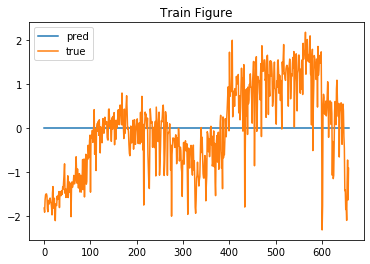

The average RMSE for training is 0.9999586477812518
The average RMSE for validation is 0.9987070364360633
When regularization strength is 100


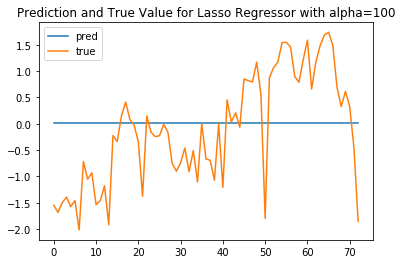

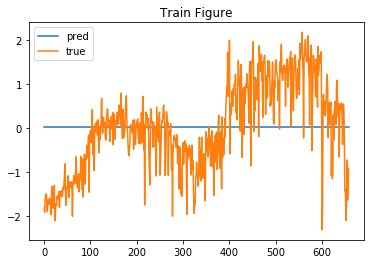

The average RMSE for training is 0.9999260886911852
The average RMSE for validation is 0.9995964017109206


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


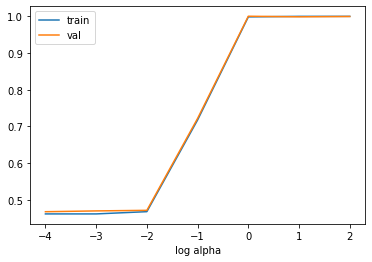

In [312]:
#Without scaling
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_lasso(day_feature_red_withlabel_noscale,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.show()

In [313]:
#Ridge
from sklearn.linear_model import Ridge

In [314]:
def evaluation_ridge(X_train,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        RD=Ridge(alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=RD.fit(train_data_feature,train_data_label)
        pred_train=RD.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=RD.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Ridge Regressor with alpha={}'.format(alpha))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When regularization strength is 0


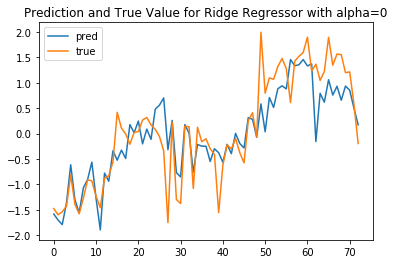

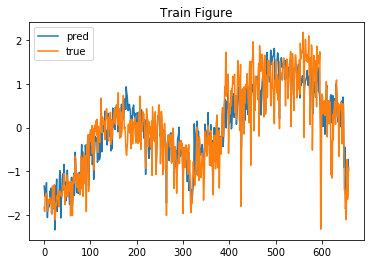

The average RMSE for training is 0.4617494625678461
The average RMSE for validation is 0.46870225603420695
When regularization strength is 0.0001


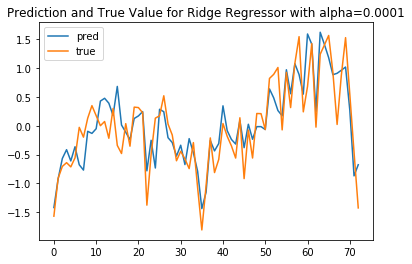

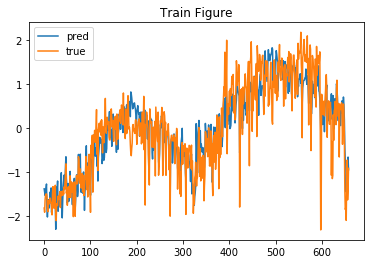

The average RMSE for training is 0.4618356872830245
The average RMSE for validation is 0.46973062199676024
When regularization strength is 0.001


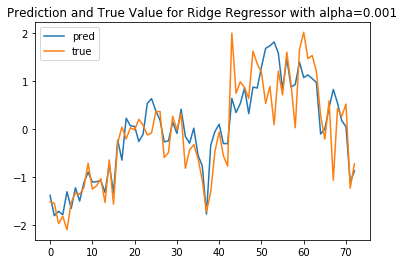

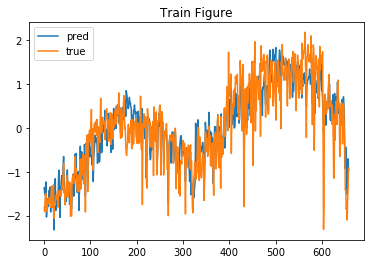

The average RMSE for training is 0.46192132024681615
The average RMSE for validation is 0.466740845917004
When regularization strength is 0.01


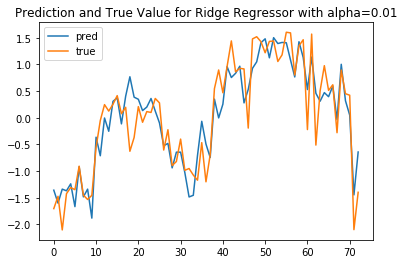

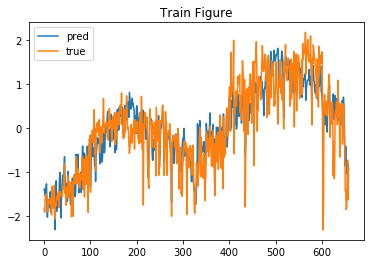

The average RMSE for training is 0.46185650213223023
The average RMSE for validation is 0.46954721178274134
When regularization strength is 0.1


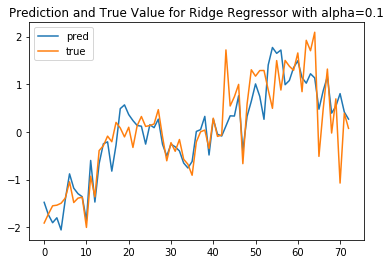

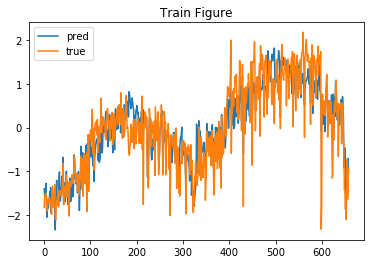

The average RMSE for training is 0.46182448342768845
The average RMSE for validation is 0.4677143516104513
When regularization strength is 1


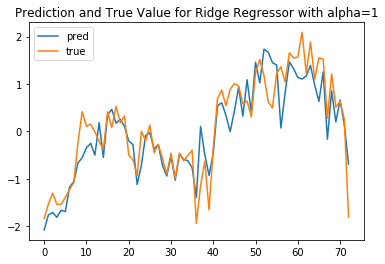

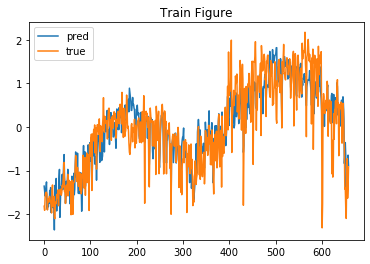

The average RMSE for training is 0.4617395649192181
The average RMSE for validation is 0.4640512284774112
When regularization strength is 10


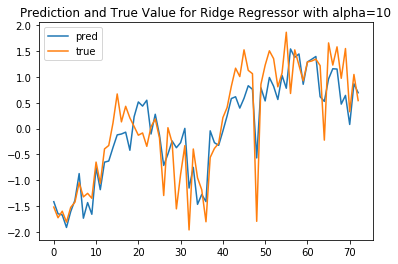

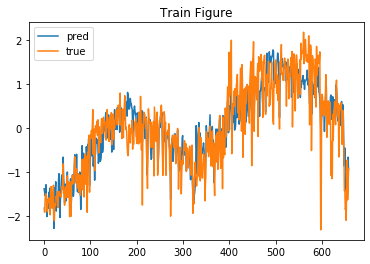

The average RMSE for training is 0.46195812675794895
The average RMSE for validation is 0.46752083019271157
When regularization strength is 100


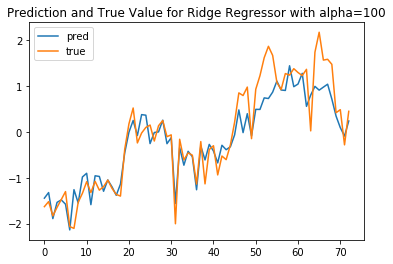

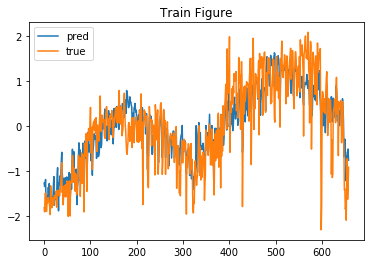

The average RMSE for training is 0.4715445863462618
The average RMSE for validation is 0.47376638996369247


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'RMSE')

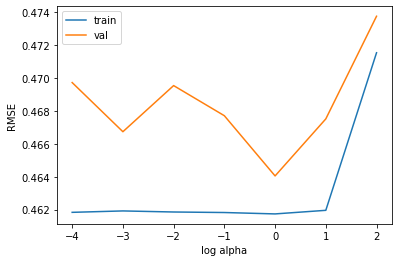

In [316]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_ridge(day_feature_red_withlabel,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')

When regularization strength is 0


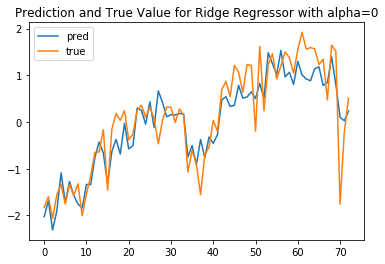

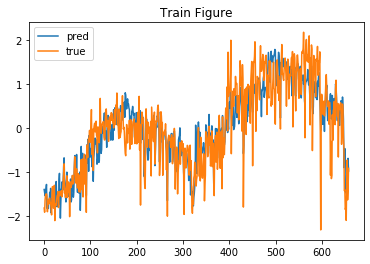

The average RMSE for training is 0.4618450851326442
The average RMSE for validation is 0.46891296317025183
When regularization strength is 0.0001


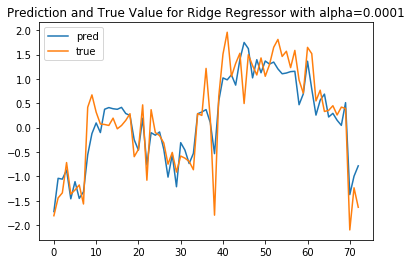

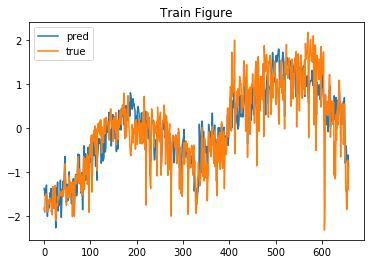

The average RMSE for training is 0.46194628033131346
The average RMSE for validation is 0.465744701702057
When regularization strength is 0.001


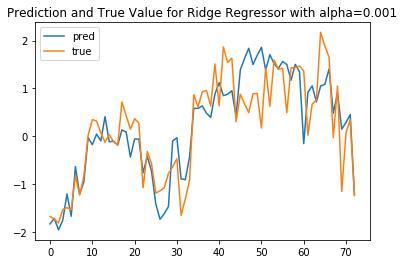

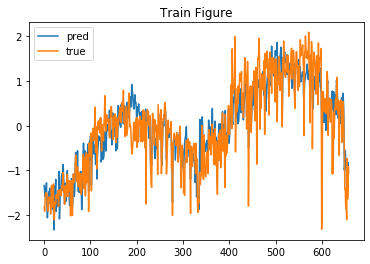

The average RMSE for training is 0.46182265246184573
The average RMSE for validation is 0.4680972267052713
When regularization strength is 0.01


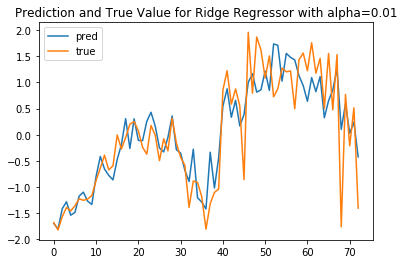

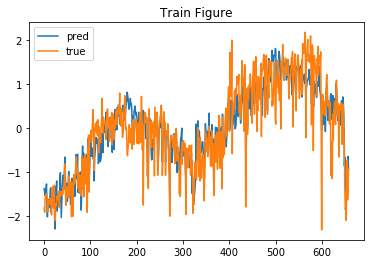

The average RMSE for training is 0.46191867737734205
The average RMSE for validation is 0.46526884711354854
When regularization strength is 0.1


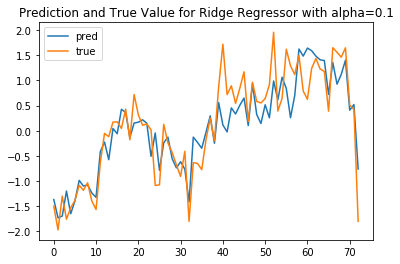

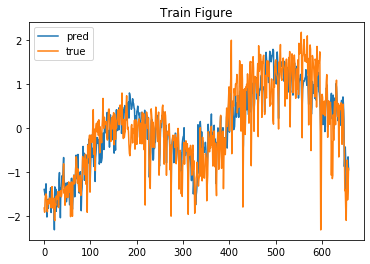

The average RMSE for training is 0.461836907775086
The average RMSE for validation is 0.46744770660120094
When regularization strength is 1


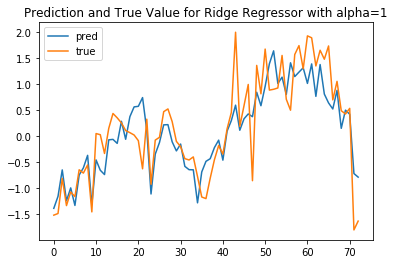

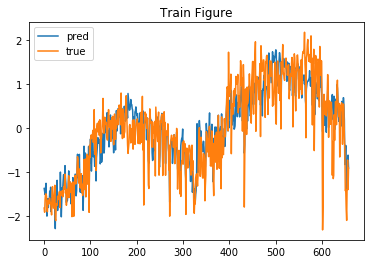

The average RMSE for training is 0.46214388230106884
The average RMSE for validation is 0.4640883771497368
When regularization strength is 10


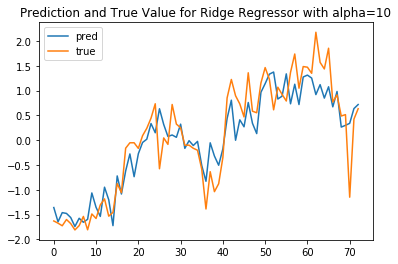

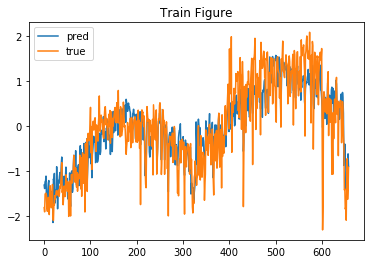

The average RMSE for training is 0.4736421791149631
The average RMSE for validation is 0.476004271775027
When regularization strength is 100


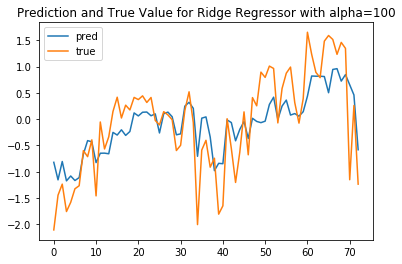

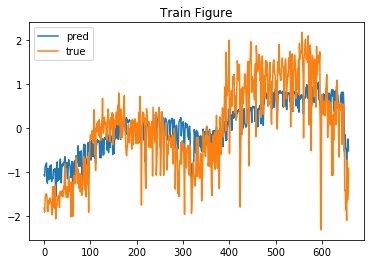

The average RMSE for training is 0.6148811380004102
The average RMSE for validation is 0.6168142516912576


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'RMSE')

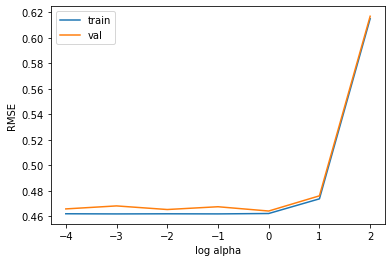

In [317]:
#Without scaling
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_ridge(day_feature_red_withlabel_noscale,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')

# Polynomial

In [318]:
#polynoimal regression
from sklearn.preprocessing import PolynomialFeatures

#look up for the most salient feature
those features come from the result of polynomial, 7 features are chosen

In [319]:
poly=PolynomialFeatures(degree=3)
day_feature_poly=poly.fit_transform(day_feature_red)
print(day_feature_poly.shape)
day_label=day_label.reshape(len(day_label),1)
print(np.shape(day_feature_red))

(731, 120)
(731, 7)


In [320]:
print(day_label.shape)
day_feature_poly_withlabel=np.concatenate((day_feature_poly,day_label),axis=1)
print(day_feature_poly_withlabel.shape)

(731, 1)
(731, 121)


In [321]:
def evaluation_poly(i,day_label):
    poly=PolynomialFeatures(degree=i)
    day_feature_poly=poly.fit_transform(day_feature_red)
    day_label=day_label.reshape(len(day_label),1)
    day_feature_poly_withlabel=np.concatenate((day_feature_poly,day_label),axis=1)
    [RMSE_train,RMSE_val]=evaluation_ridge(day_feature_poly_withlabel,1)
    return RMSE_train,RMSE_val

When the polynomial degree is 1


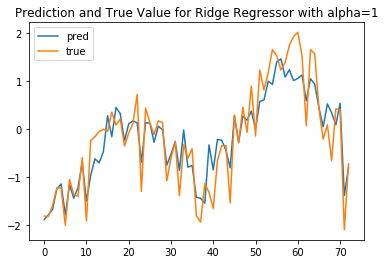

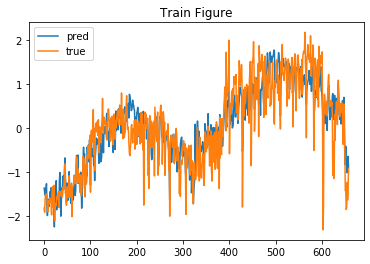

The average RMSE for training is 0.4617439088110076
The average RMSE for validation is 0.4682514443394338
When the polynomial degree is 2


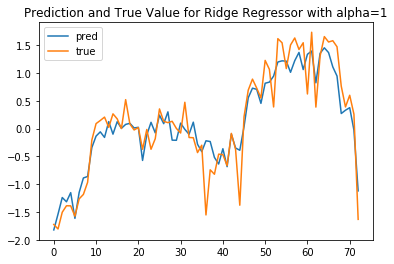

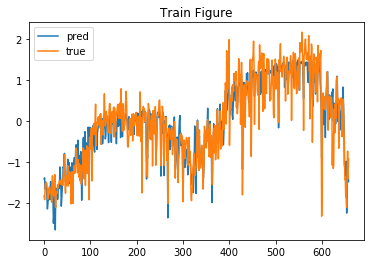

The average RMSE for training is 0.3700932202458603
The average RMSE for validation is 0.39368298193668555
When the polynomial degree is 3


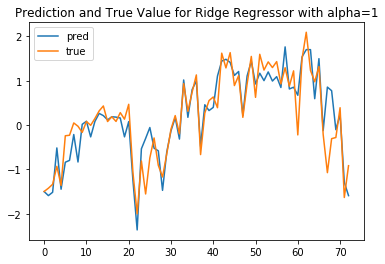

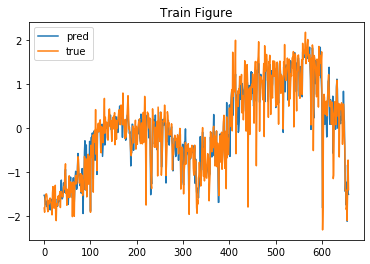

The average RMSE for training is 0.3019988363844269
The average RMSE for validation is 0.37241545507782514
When the polynomial degree is 4


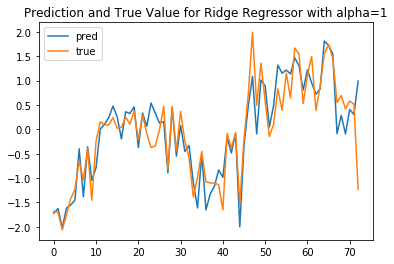

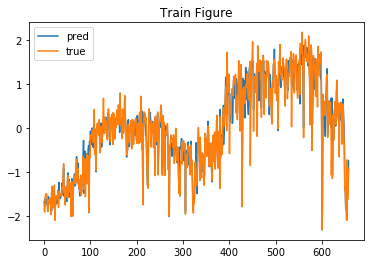

The average RMSE for training is 0.25753938715919744
The average RMSE for validation is 0.4881355718697936
When the polynomial degree is 5


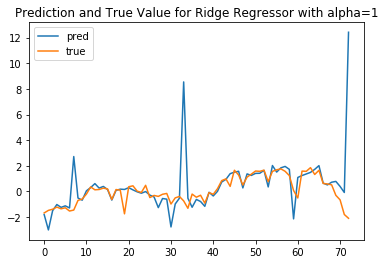

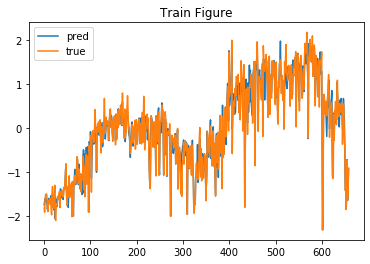

The average RMSE for training is 0.22021584698392777
The average RMSE for validation is 0.9353914019892512


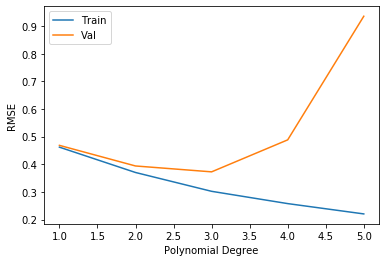

In [322]:
degree=[1,2,3,4,5]
RMSE_train=[]
RMSE_val=[]
for i in degree:
    print('When the polynomial degree is {}'.format(i))
    RMSE_train_sub,RMSE_val_sub=evaluation_poly(i,day_label)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.plot(degree,RMSE_train)
plt.plot(degree,RMSE_val)
plt.legend(['Train','Val'])
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.show()

# Neural Network

In [115]:
#neural network
from sklearn.neural_network import MLPRegressor

In [116]:
def evaluation_neural(X_train,size,activation,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        model=MLPRegressor(hidden_layer_sizes=size,activation=activation,solver='sgd',alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=model.fit(train_data_feature,train_data_label)
        pred_train=model.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        pred_val=model.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
    RMSE_train_ave=np.mean(RMSE_train)
    RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Neural Network with depth={} and activation as {}'.format(size,activation))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When the network activation function is identity


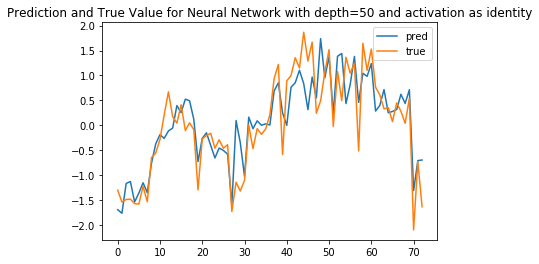

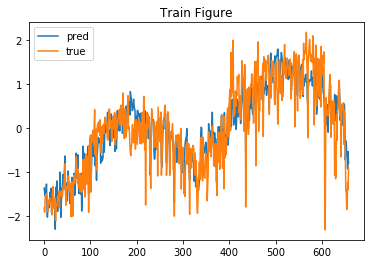

The average RMSE for training is 0.46324043456309444
The average RMSE for validation is 0.46941966333681506
When the network activation function is logistic


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

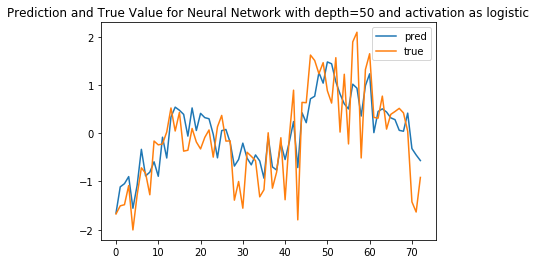

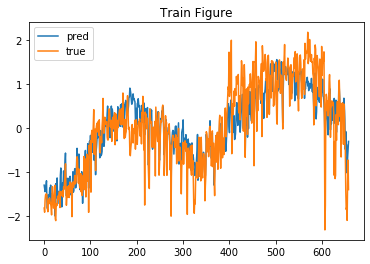

The average RMSE for training is 0.49048460464403953
The average RMSE for validation is 0.4922178417131463
When the network activation function is tanh


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


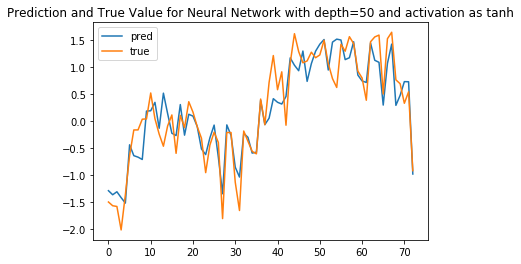

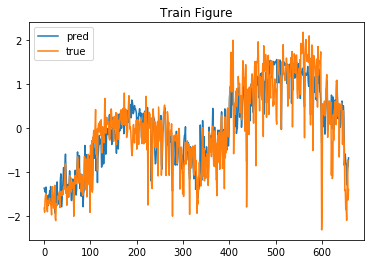

The average RMSE for training is 0.44494045043226793
The average RMSE for validation is 0.4534278795055286
When the network activation function is relu


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


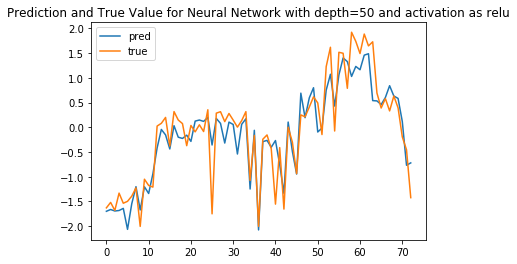

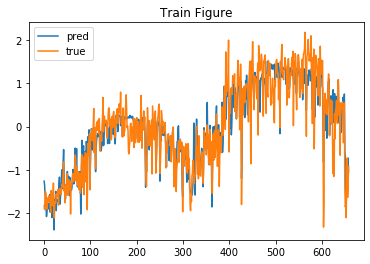

The average RMSE for training is 0.39354812747575285
The average RMSE for validation is 0.41651248690130627


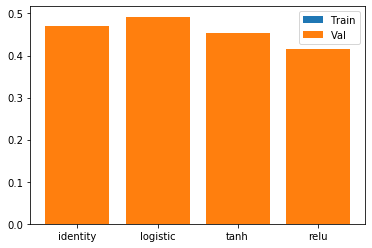

In [117]:
#Activation Function
activation=['identity','logistic','tanh','relu']
RMSE_train=[]
RMSE_val=[]
for act in activation:
    print('When the network activation function is {}'.format(act))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(day_feature_red_withlabel,50,act,alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.bar(activation,RMSE_train)
plt.bar(activation,RMSE_val)
plt.legend(['Train','Val'])



When the network activation function is relu


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


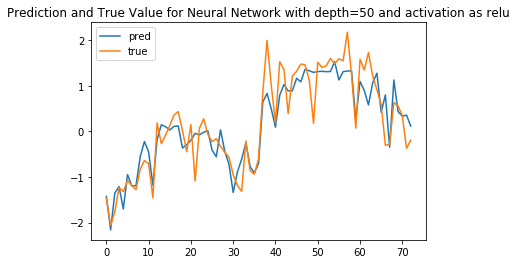

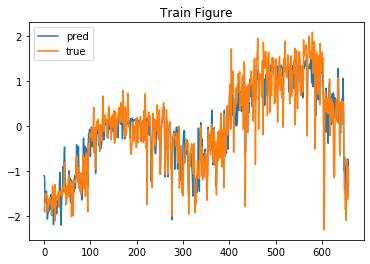

The average RMSE for training is 0.3924281109031853
The average RMSE for validation is 0.409123091513516
When the network activation function is relu


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


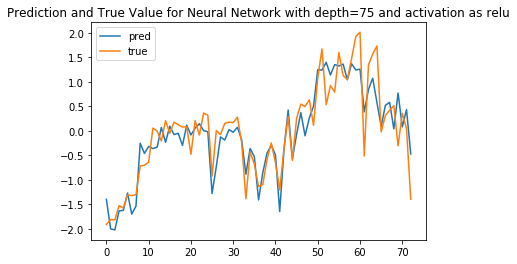

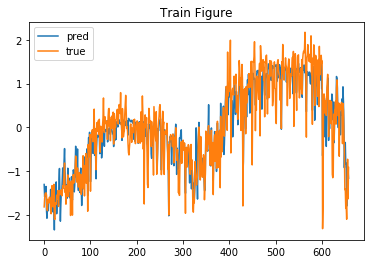

The average RMSE for training is 0.39169385828855374
The average RMSE for validation is 0.4055566788498
When the network activation function is relu


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


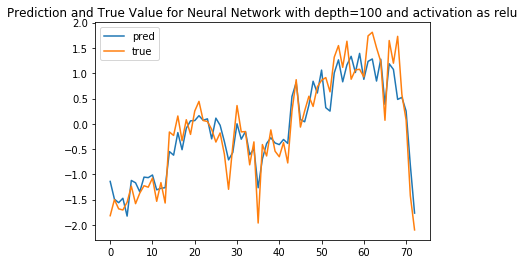

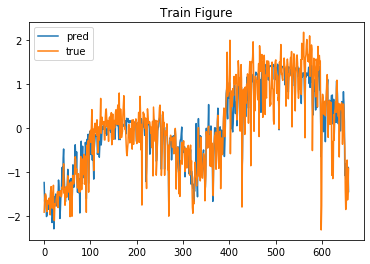

The average RMSE for training is 0.39018571727880846
The average RMSE for validation is 0.4028217352455804
When the network activation function is relu


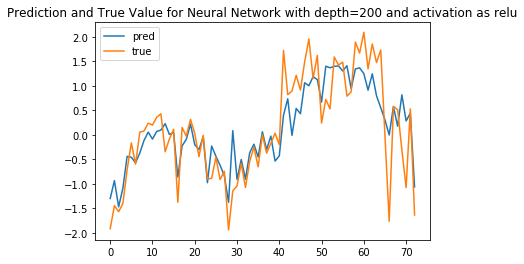

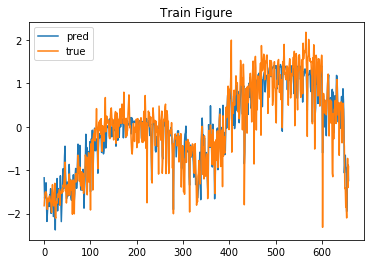

The average RMSE for training is 0.3875918024545211
The average RMSE for validation is 0.40015476770916597
When the network activation function is relu


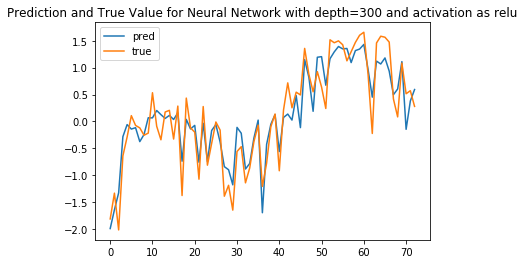

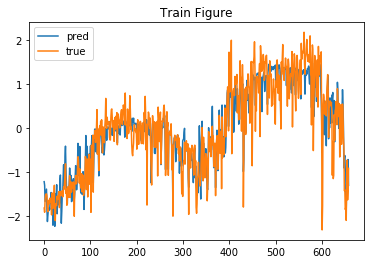

The average RMSE for training is 0.38614119091823823
The average RMSE for validation is 0.3991796464973793
When the network activation function is relu


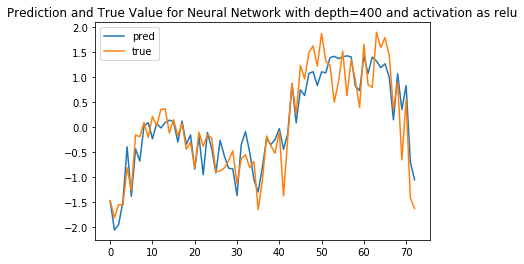

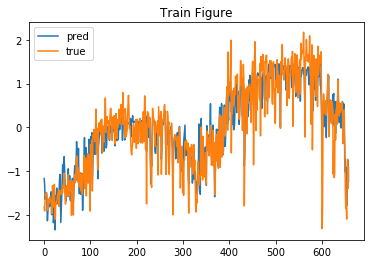

The average RMSE for training is 0.3847492593298087
The average RMSE for validation is 0.39647948207930356
When the network activation function is relu


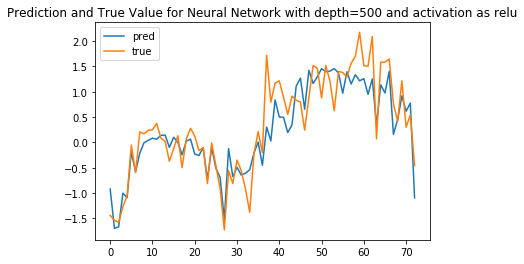

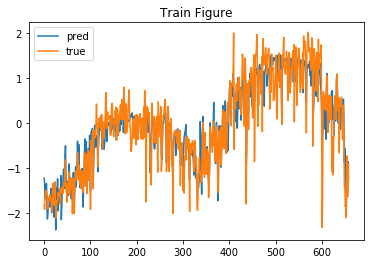

The average RMSE for training is 0.38464321409233626
The average RMSE for validation is 0.39682247928444314


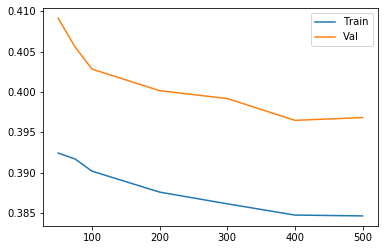

In [118]:
#Hidden Layer Size
size=[50,75,100,200,300,400,500]
activation=['identity','logistic','tanh','relu']
RMSE_train=[]
RMSE_val=[]
for s in size:
    print('When the network size is {}'.format(s))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(day_feature_red_withlabel,s,'relu',alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.plot(size,RMSE_train)
plt.plot(size,RMSE_val)
plt.legend(['Train','Val'])


When the network hidden layer size is [400, 200]


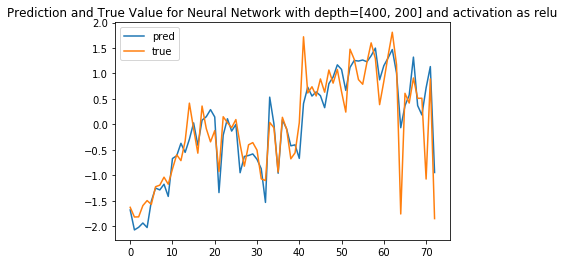

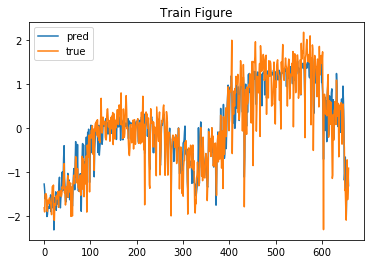

The average RMSE for training is 0.3587830638472367
The average RMSE for validation is 0.37541901796335797
When the network hidden layer size is [400, 300, 200]


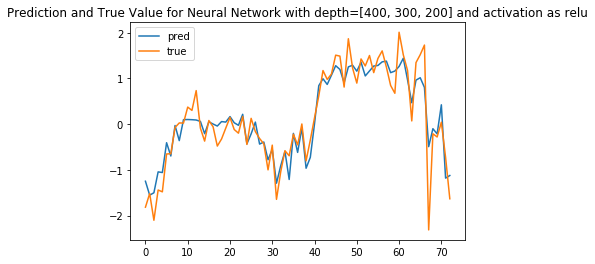

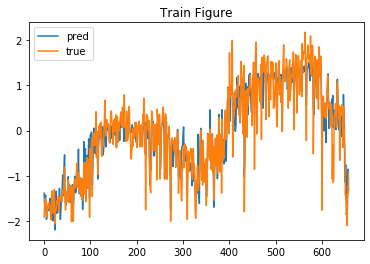

The average RMSE for training is 0.34621091326378667
The average RMSE for validation is 0.36912797473923936
When the network hidden layer size is [400, 300, 200, 100]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


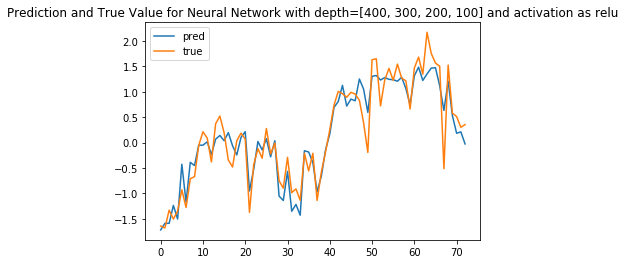

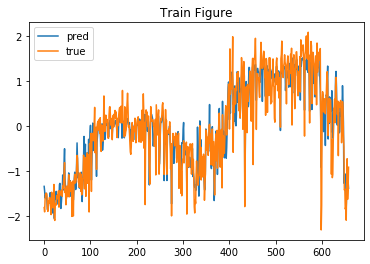

The average RMSE for training is 0.33775552433852374
The average RMSE for validation is 0.3621753830096178
When the network hidden layer size is [400, 300, 200, 100, 50]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

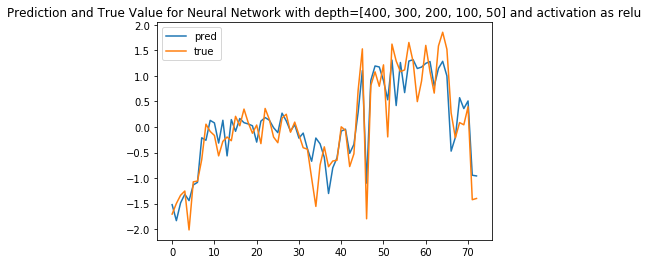

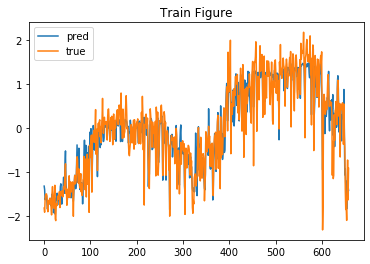

The average RMSE for training is 0.3287605304875138
The average RMSE for validation is 0.35655584457534023
When the network hidden layer size is [400, 300, 200, 100, 50, 30]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

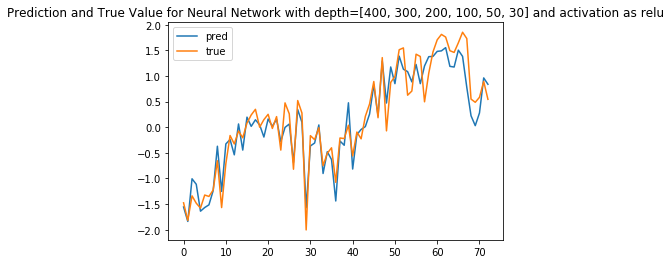

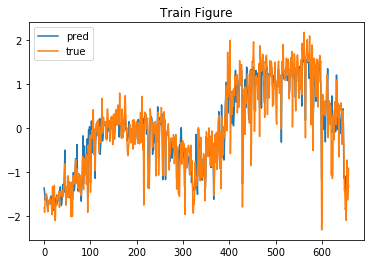

The average RMSE for training is 0.32375348271058646
The average RMSE for validation is 0.35681612778685357
When the network hidden layer size is [400, 300, 200, 100, 50, 30, 15]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

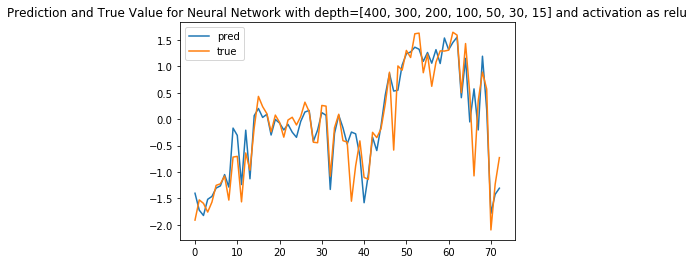

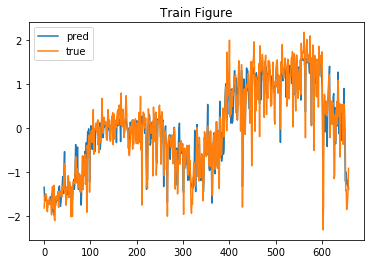

The average RMSE for training is 0.32615937724297306
The average RMSE for validation is 0.3596823776685521


In [119]:
#Network Depth
size=[]
size.append([400,200])
size.append([400,300,200])
size.append([400,300,200,100])
size.append([400,300,200,100,50])
size.append([400,300,200,100,50,30])
size.append([400,300,200,100,50,30,15])
RMSE_train=[]
RMSE_val=[]
for size_sub in size:
    print('When the network hidden layer size is {}'.format(size_sub))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(day_feature_red_withlabel,size_sub,activation='relu',alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)




When the regularization strength is 0


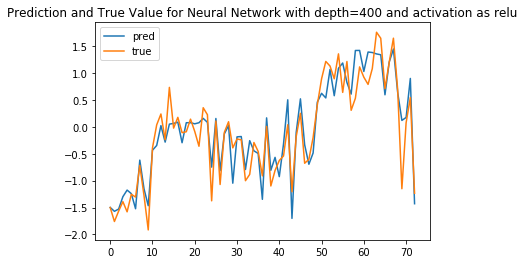

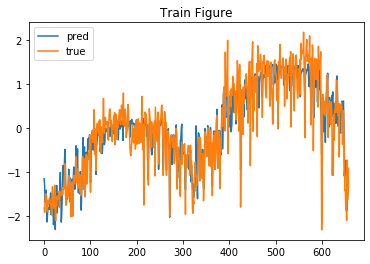

The average RMSE for training is 0.3853513434328425
The average RMSE for validation is 0.39593934927738994
When the regularization strength is 1e-05


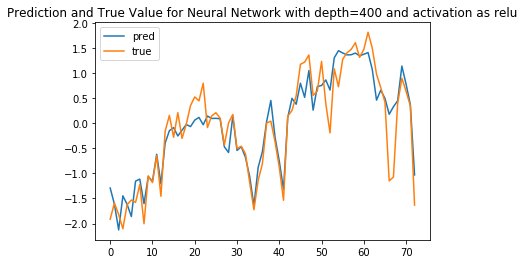

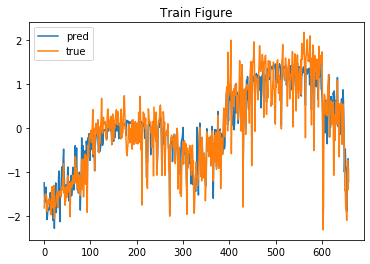

The average RMSE for training is 0.385181327026114
The average RMSE for validation is 0.39595879375554716
When the regularization strength is 0.0001


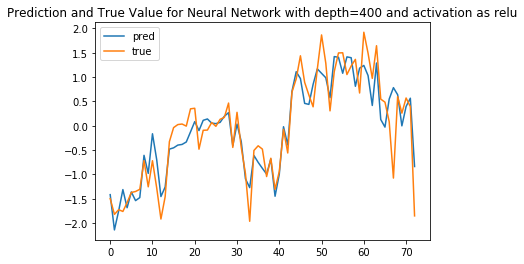

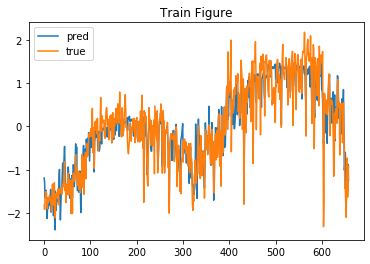

The average RMSE for training is 0.38714795936071833
The average RMSE for validation is 0.4018475966424536
When the regularization strength is 0.001


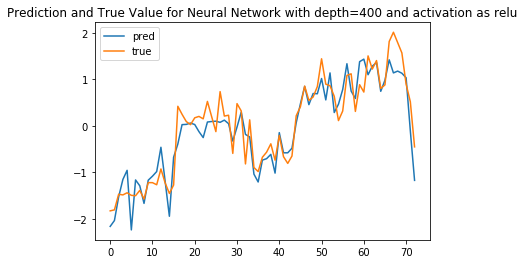

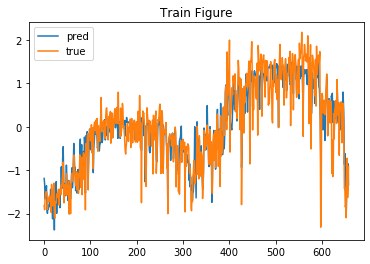

The average RMSE for training is 0.38558976753811597
The average RMSE for validation is 0.40036463759070245
When the regularization strength is 0.01


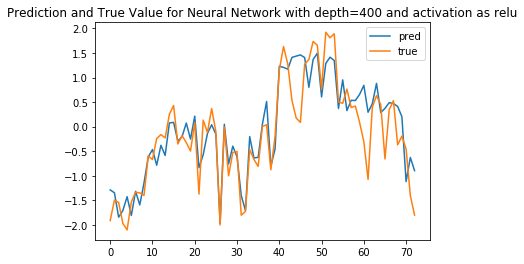

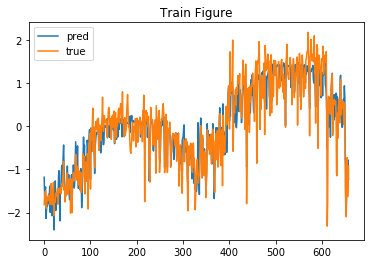

The average RMSE for training is 0.38445711782200404
The average RMSE for validation is 0.3948314504913162
When the regularization strength is 0.1


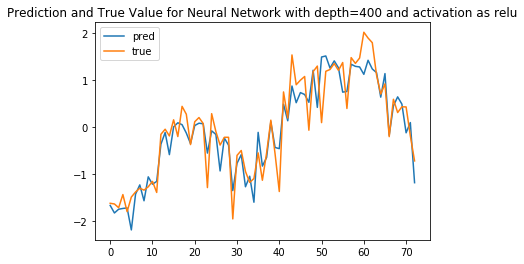

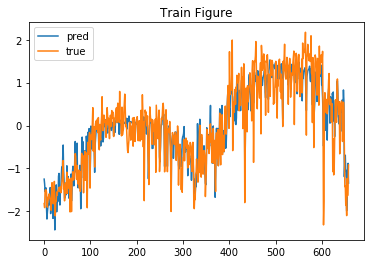

The average RMSE for training is 0.3864080266168168
The average RMSE for validation is 0.3991374034734988
When the regularization strength is 1


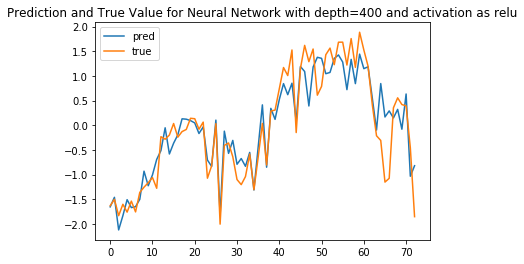

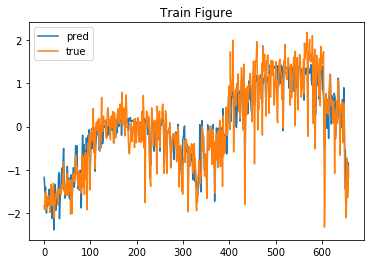

The average RMSE for training is 0.3841769155388076
The average RMSE for validation is 0.40170033731721216
When the regularization strength is 10


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

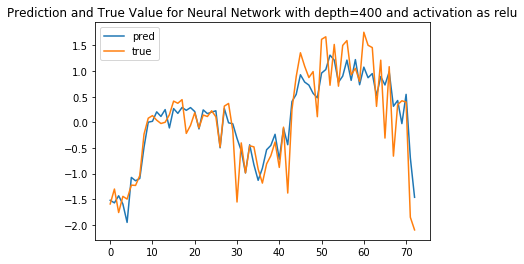

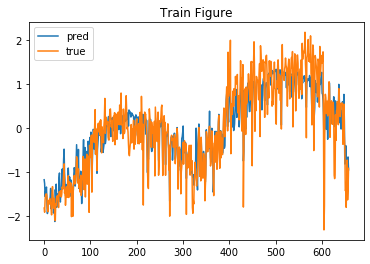

The average RMSE for training is 0.41409281987889635
The average RMSE for validation is 0.4228369260949236
When the regularization strength is 100.0


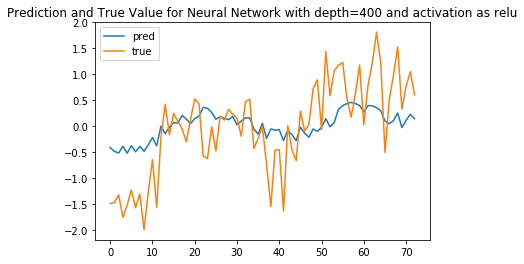

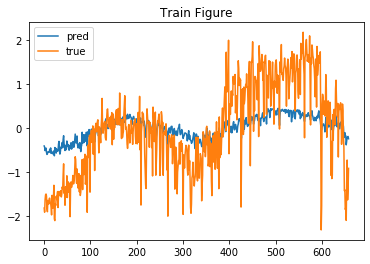

The average RMSE for training is 0.8059162039830261
The average RMSE for validation is 0.8076869815482641


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


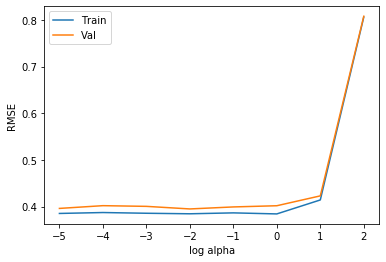

In [121]:
#Regularization Strength
alpha=[0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,1e2]
RMSE_train=[]
RMSE_val=[]
for a in alpha:
    print('When the regularization strength is {}'.format(a))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(day_feature_red_withlabel,400,'relu',alpha=a)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)

plt.plot(np.log10(alpha),RMSE_train)
plt.plot(np.log10(alpha),RMSE_val)
plt.legend(['Train','Val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')
plt.show()

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

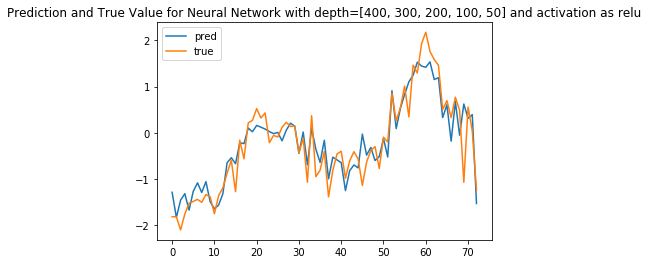

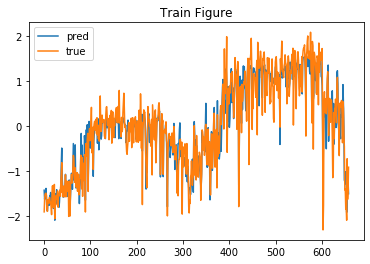

The average RMSE for training is 0.3267461953113583
The average RMSE for validation is 0.3584062189842608


In [130]:
#The best configuration evalutation
RMSE_train_sub,RMSE_val_sub=evaluation_neural(day_feature_red_withlabel,[400,300,200,100,50],'relu',alpha=0.01)


# Random Forest

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [21]:
def evaluation_randomforest(X_train,n,max_features,max_depth):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    OOB=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        model=RandomForestRegressor(n_estimators=n,max_features=max_features,max_depth=max_depth,oob_score=True)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=model.fit(train_data_feature,train_data_label)
        pred_train=model.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=model.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
        OOB.append(1-mdl.oob_score_)
    OOB_ave=np.mean(OOB)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Random Forest with estimator number={} and maximum features as {}, and max_depth={}'.format(n,max_features,max_depth))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    print('The average OOB of Random Forest model is {}'.format(OOB_ave))
    return RMSE_train_ave,RMSE_val_ave,OOB_ave

When n_estimator is 2


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB score

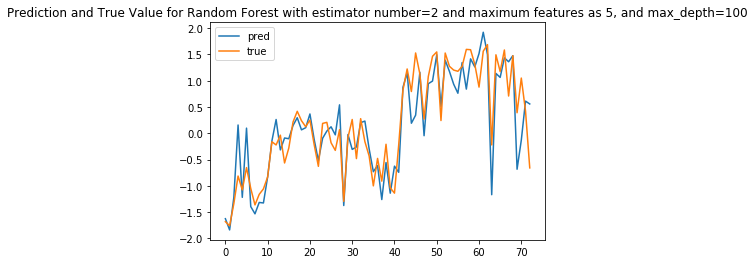

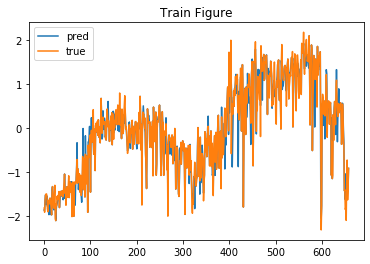

The average RMSE for training is 0.24667822135114018
The average RMSE for validation is 0.45906298460316597
The average OOB of Random Forest model is 0.5583192091339396
When n_estimator is 10


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB score

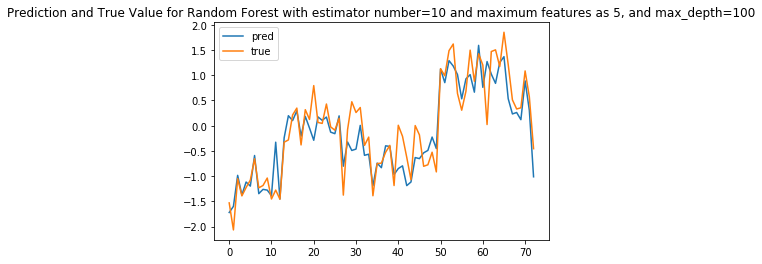

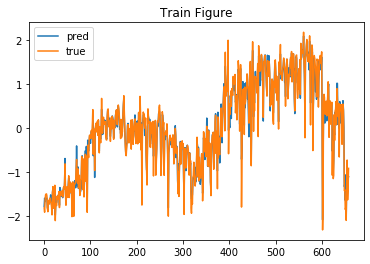

The average RMSE for training is 0.17126113215717048
The average RMSE for validation is 0.408794656643184
The average OOB of Random Forest model is 0.20476042706167535
When n_estimator is 20


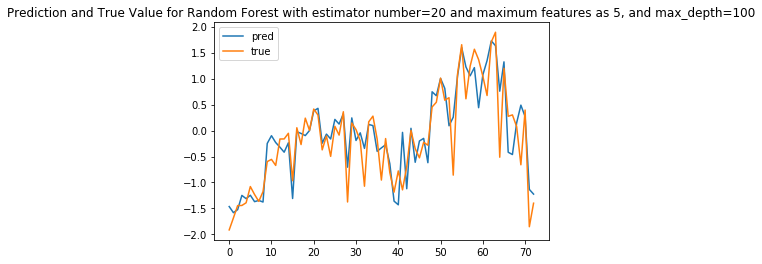

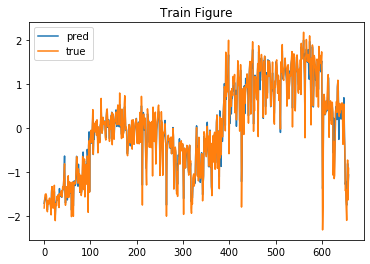

The average RMSE for training is 0.155276150096952
The average RMSE for validation is 0.38831131355709647
The average OOB of Random Forest model is 0.16964029118765458
When n_estimator is 30


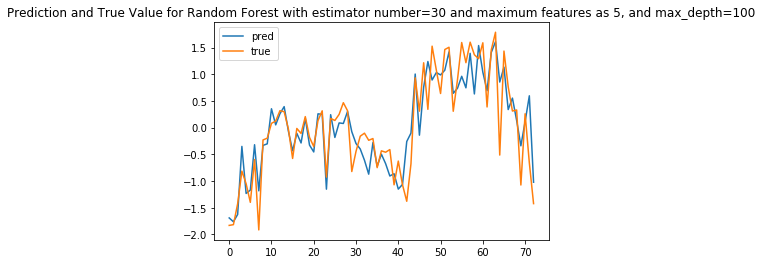

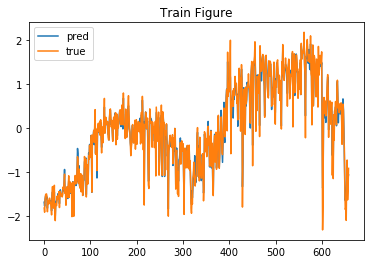

The average RMSE for training is 0.15103297964458287
The average RMSE for validation is 0.38156447618238226
The average OOB of Random Forest model is 0.16223307687253116
When n_estimator is 40


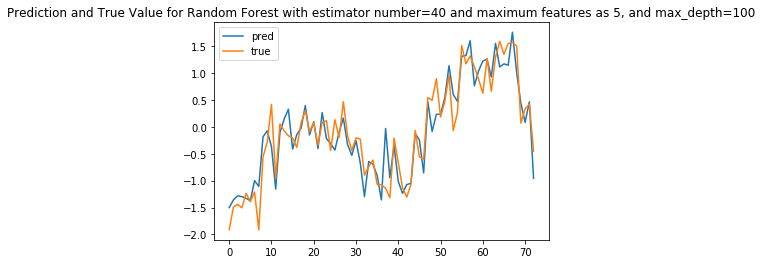

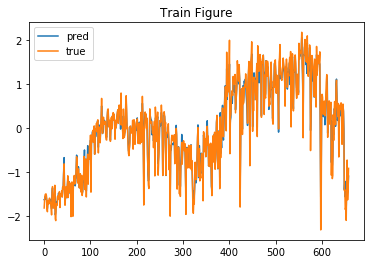

The average RMSE for training is 0.14946761083689392
The average RMSE for validation is 0.38179630223971295
The average OOB of Random Forest model is 0.16005150601349433
When n_estimator is 50


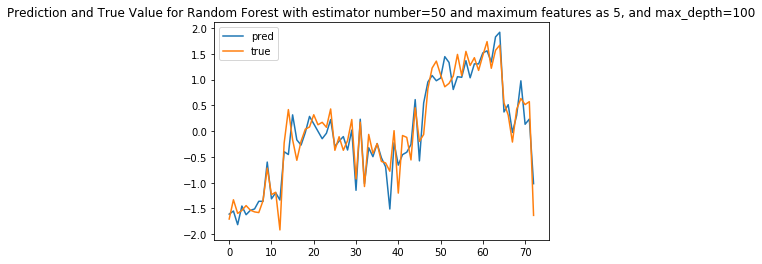

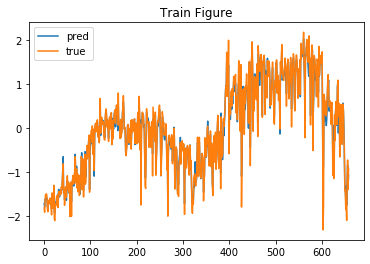

The average RMSE for training is 0.1477997721202278
The average RMSE for validation is 0.38092539815976434
The average OOB of Random Forest model is 0.15644339862029805
When n_estimator is 60


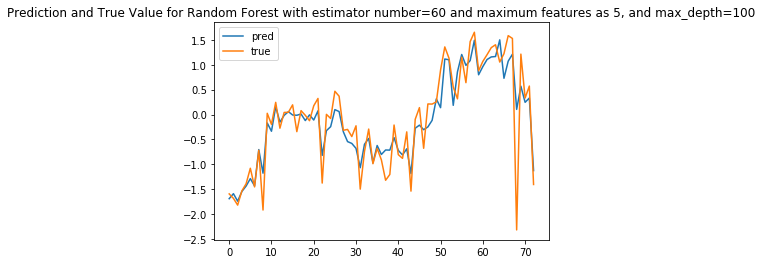

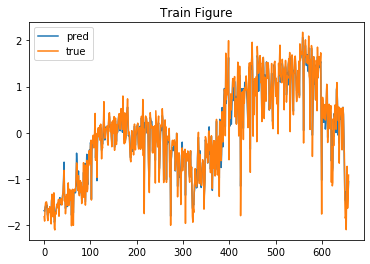

The average RMSE for training is 0.1474359499559538
The average RMSE for validation is 0.3838523906442196
The average OOB of Random Forest model is 0.1551955948679255
When n_estimator is 70


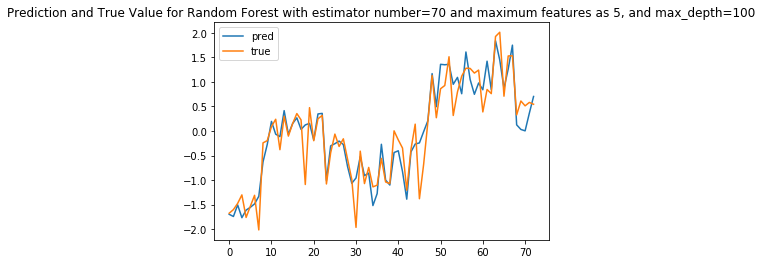

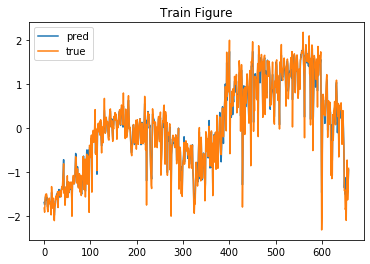

The average RMSE for training is 0.1455366390775574
The average RMSE for validation is 0.37861097014637257
The average OOB of Random Forest model is 0.15454474899918053
When n_estimator is 80


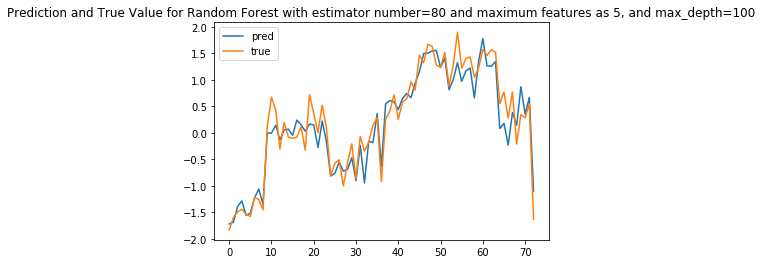

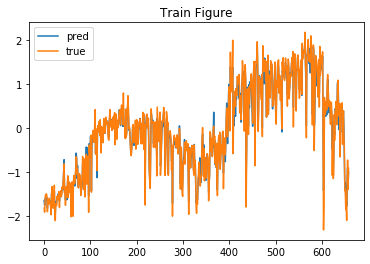

The average RMSE for training is 0.14456696916952336
The average RMSE for validation is 0.38208167912830576
The average OOB of Random Forest model is 0.15159694052791678
When n_estimator is 90


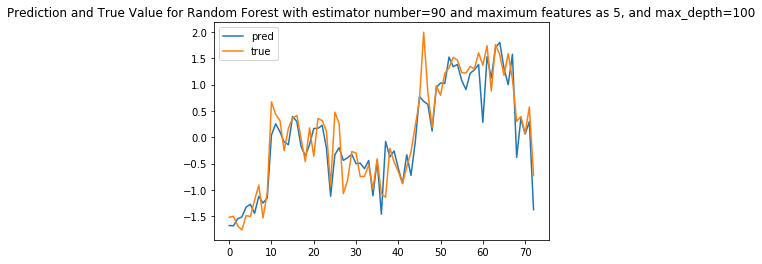

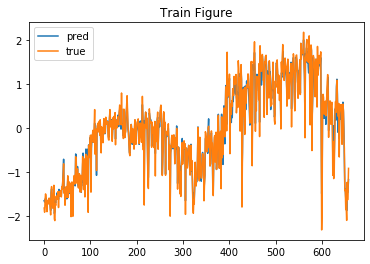

The average RMSE for training is 0.1444738437018363
The average RMSE for validation is 0.3779356760219338
The average OOB of Random Forest model is 0.15173018968382923
When n_estimator is 100


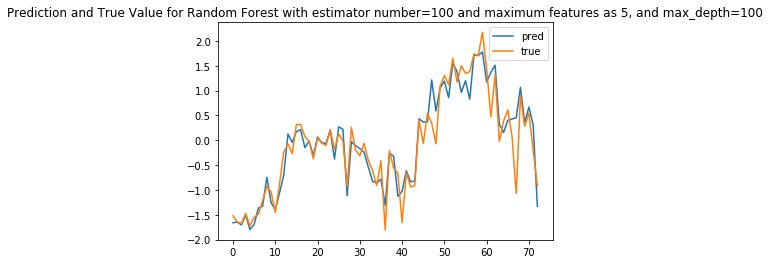

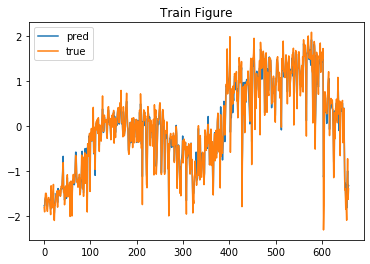

The average RMSE for training is 0.14380882466176018
The average RMSE for validation is 0.3810927703360103
The average OOB of Random Forest model is 0.15234983442564598
When n_estimator is 110


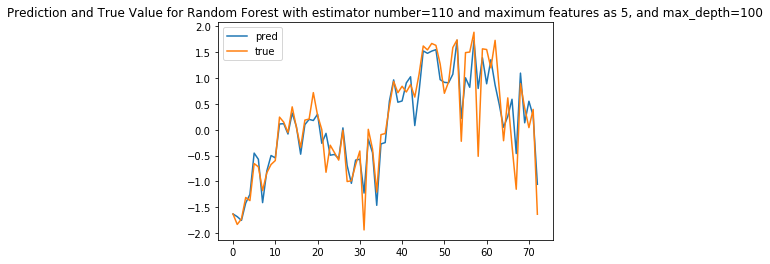

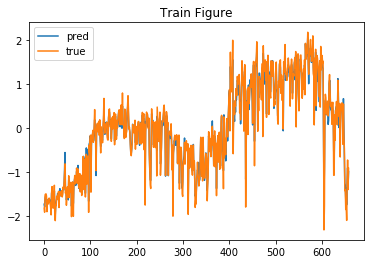

The average RMSE for training is 0.14375665462703952
The average RMSE for validation is 0.3859628461250722
The average OOB of Random Forest model is 0.15143432725402
Loop is done


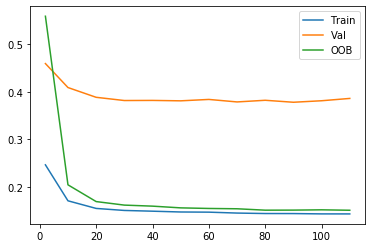

In [124]:
#Number of Trees
n_estimators=[2,10,20,30,40,50,60,70,80,90,100,110]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for n in n_estimators:
    print('When n_estimator is {}'.format(n))
    RMSE_train_sub,RMSE_val_sub,OOB_sub=evaluation_randomforest(day_feature_red_withlabel,n,5,100)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
print('Loop is done')
plt.plot(n_estimators,RMSE_train)
plt.plot(n_estimators,RMSE_val)
plt.plot(n_estimators,OOB)
plt.legend(['Train','Val','OOB'])

When maximum_feature is 1


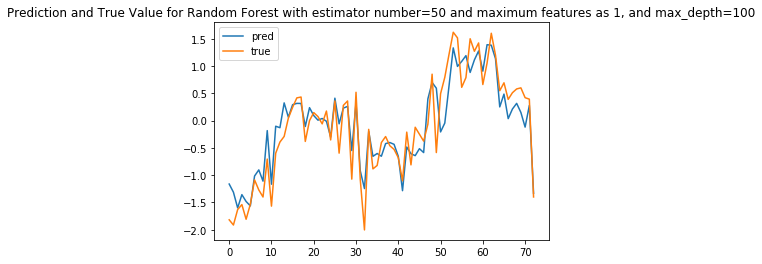

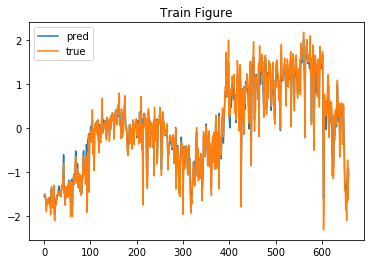

The average RMSE for training is 0.1501506592766623
The average RMSE for validation is 0.3861620011759841
The average OOB of Random Forest model is 0.16130105022679384
When maximum_feature is 2


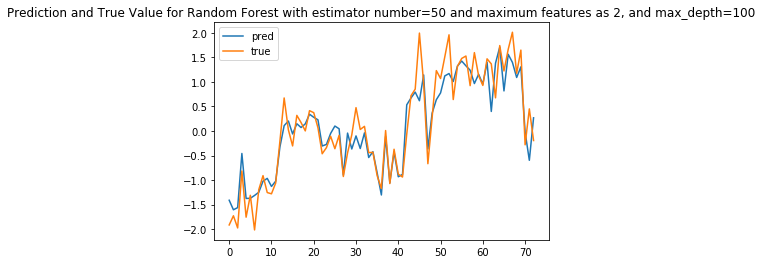

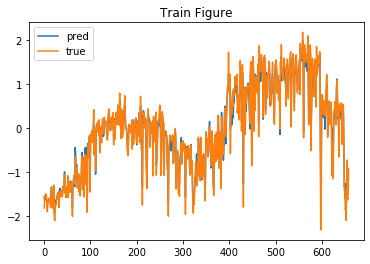

The average RMSE for training is 0.14637742007691737
The average RMSE for validation is 0.37413749505054417
The average OOB of Random Forest model is 0.1536255477632808
When maximum_feature is 3


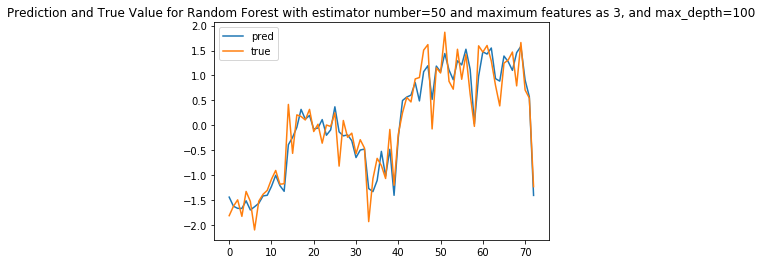

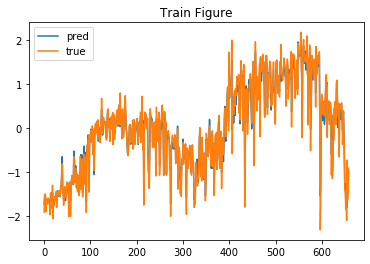

The average RMSE for training is 0.14641529360887623
The average RMSE for validation is 0.38043318350632266
The average OOB of Random Forest model is 0.15554382450456278
When maximum_feature is 4


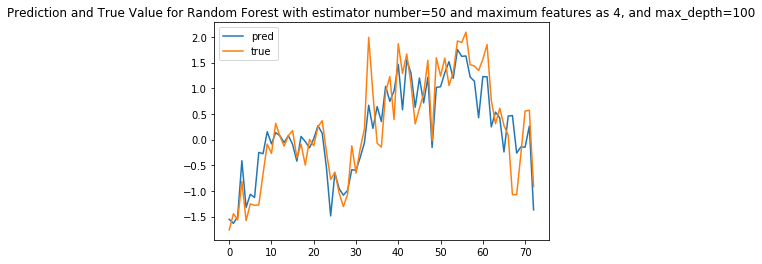

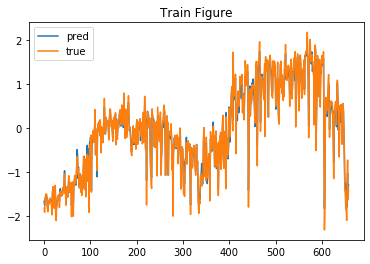

The average RMSE for training is 0.14644489674884537
The average RMSE for validation is 0.3720214925577419
The average OOB of Random Forest model is 0.1552351425860027
When maximum_feature is 5


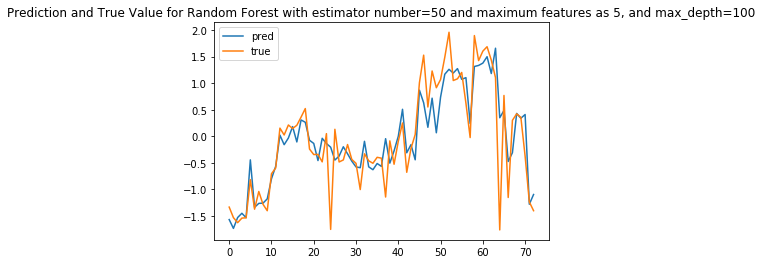

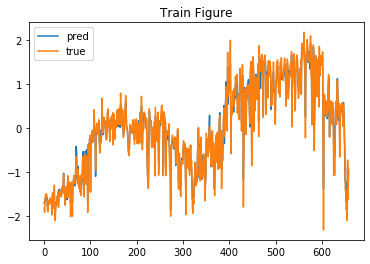

The average RMSE for training is 0.14784207157962445
The average RMSE for validation is 0.3874532519187792
The average OOB of Random Forest model is 0.1560244259524849
When maximum_feature is 6


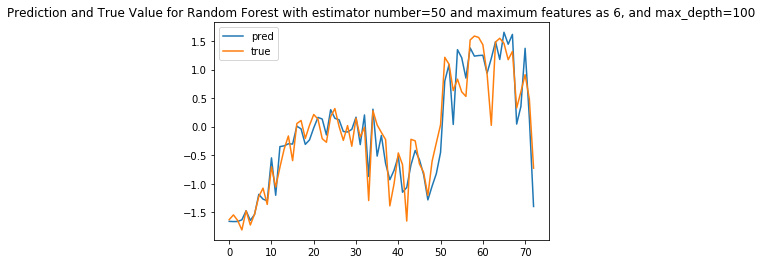

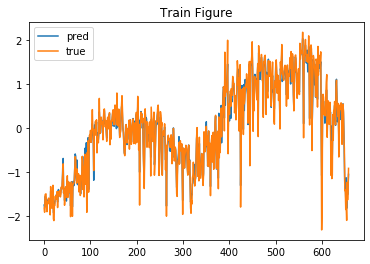

The average RMSE for training is 0.1475441029443597
The average RMSE for validation is 0.3831669030536293
The average OOB of Random Forest model is 0.15657549524633727
When maximum_feature is 7


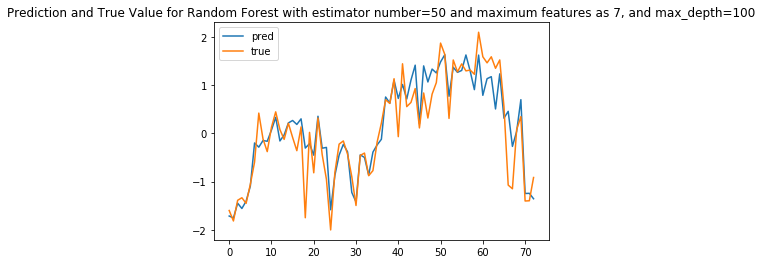

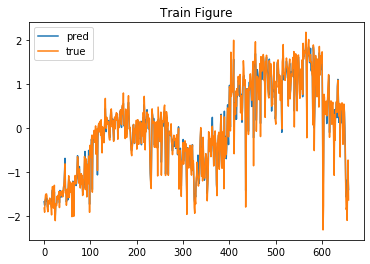

The average RMSE for training is 0.14800207693835848
The average RMSE for validation is 0.381566313198238
The average OOB of Random Forest model is 0.15513097662971337


Text(0, 0.5, 'RMSE and Error')

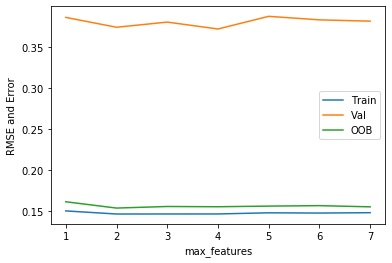

In [127]:
#Maximum features
max_features=[1,2,3,4,5,6,7]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for mf in max_features:
    print('When maximum_feature is {}'.format(mf))
    RMSE_train_sub,RMSE_val_sub,OOB_sub=evaluation_randomforest(day_feature_red_withlabel,50,mf,100)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
plt.plot(max_features,RMSE_train)
plt.plot(max_features,RMSE_val)
plt.plot(max_features,OOB)
plt.legend(['Train','Val','OOB'])
plt.xlabel('max_features')
plt.ylabel('RMSE and Error')

When maximum_feature is 7


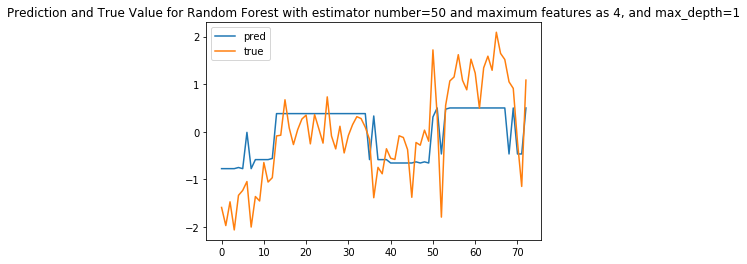

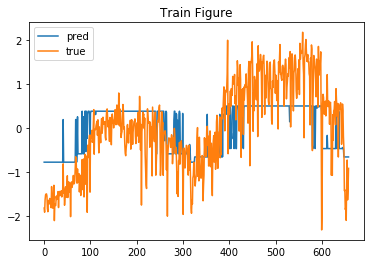

The average RMSE for training is 0.7347025743805542
The average RMSE for validation is 0.7448354989977487
The average OOB of Random Forest model is 0.5618058111872835
When maximum_feature is 7


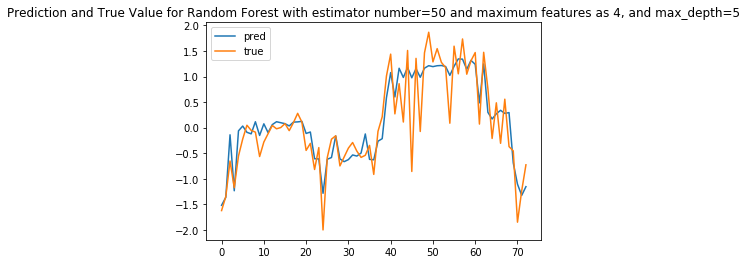

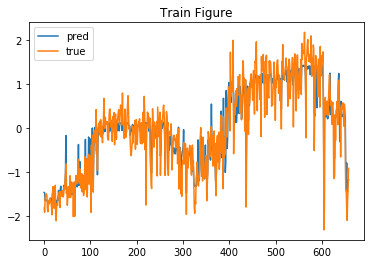

The average RMSE for training is 0.3310499821880727
The average RMSE for validation is 0.41069730842802044
The average OOB of Random Forest model is 0.1648911340490466
When maximum_feature is 7


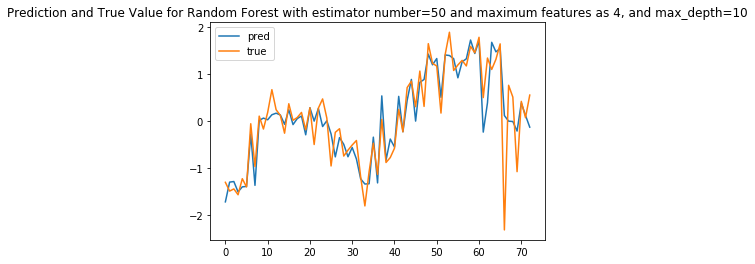

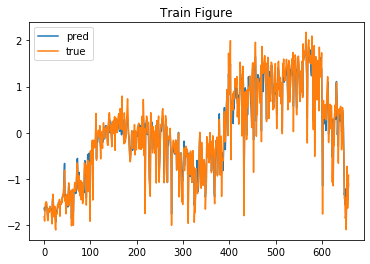

The average RMSE for training is 0.17484035783728644
The average RMSE for validation is 0.3793923004670026
The average OOB of Random Forest model is 0.15537765817738666
When maximum_feature is 7


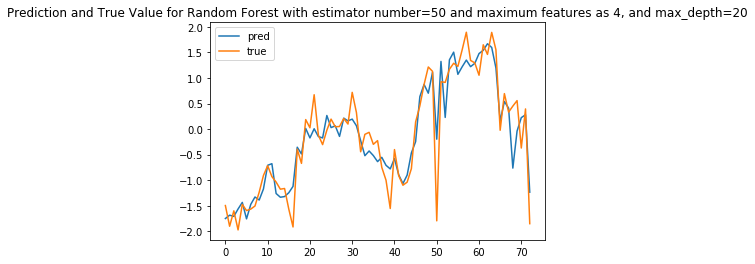

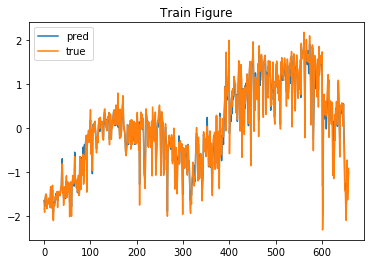

The average RMSE for training is 0.14706249687444486
The average RMSE for validation is 0.38287888785524793
The average OOB of Random Forest model is 0.1557198894185737
When maximum_feature is 7


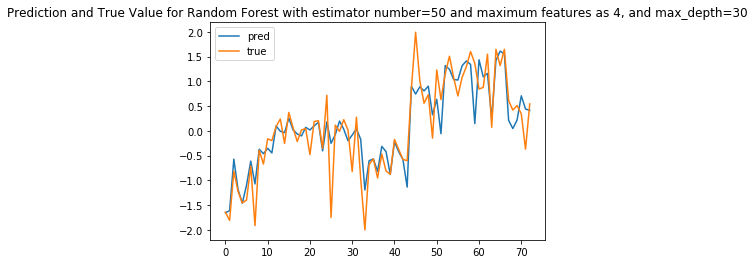

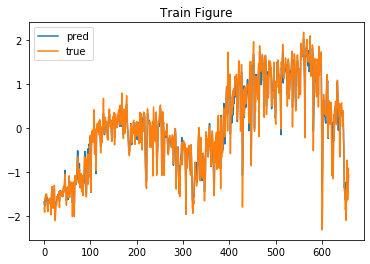

The average RMSE for training is 0.14738193577761455
The average RMSE for validation is 0.3802955511262822
The average OOB of Random Forest model is 0.15634332287908712
When maximum_feature is 7


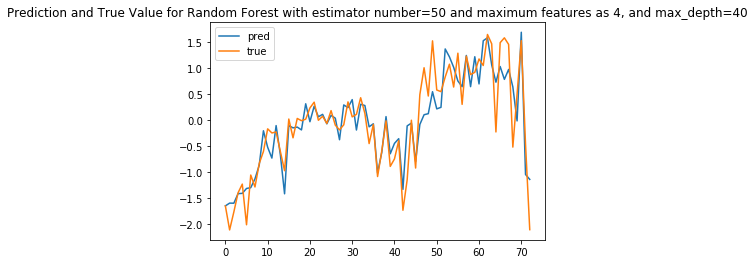

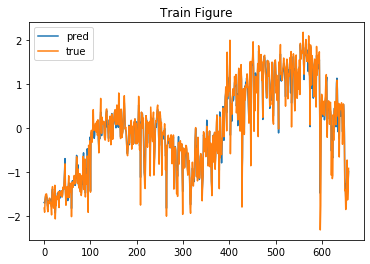

The average RMSE for training is 0.1481609422763353
The average RMSE for validation is 0.38312667177077214
The average OOB of Random Forest model is 0.15518172266737879
When maximum_feature is 7


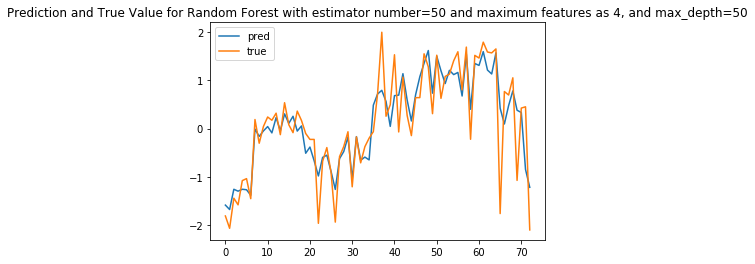

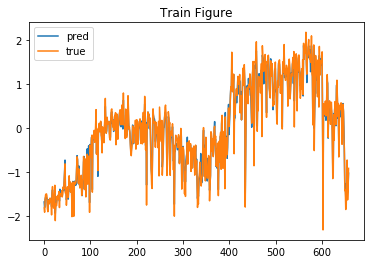

The average RMSE for training is 0.14558781995040637
The average RMSE for validation is 0.38060237939708635
The average OOB of Random Forest model is 0.15571483229640254
When maximum_feature is 7


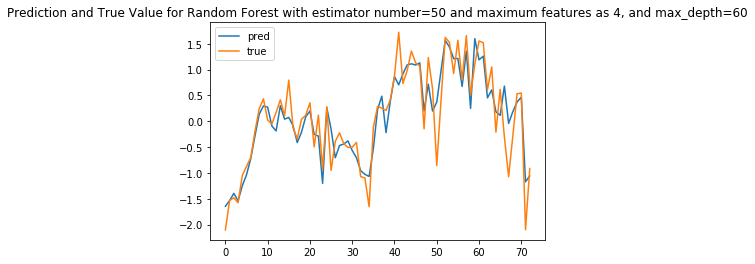

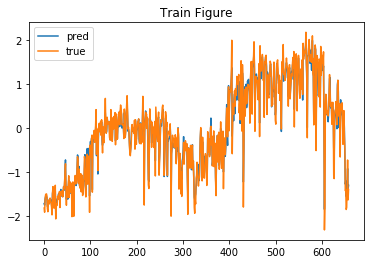

The average RMSE for training is 0.1473949878496292
The average RMSE for validation is 0.38248812033990054
The average OOB of Random Forest model is 0.15564121313664092
When maximum_feature is 7


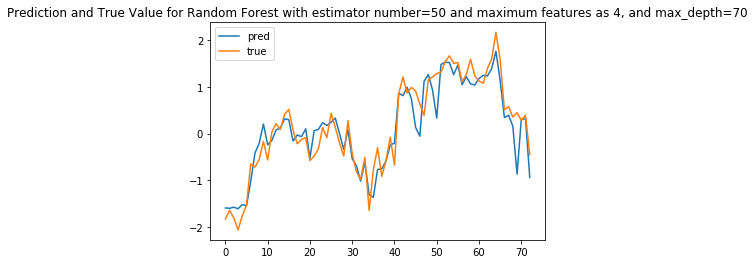

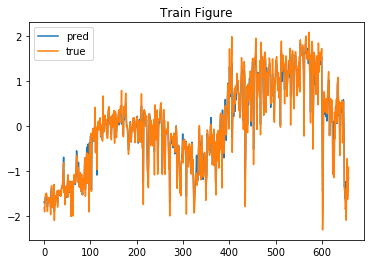

The average RMSE for training is 0.14729377478138167
The average RMSE for validation is 0.3802170959293117
The average OOB of Random Forest model is 0.15659912018349892
When maximum_feature is 7


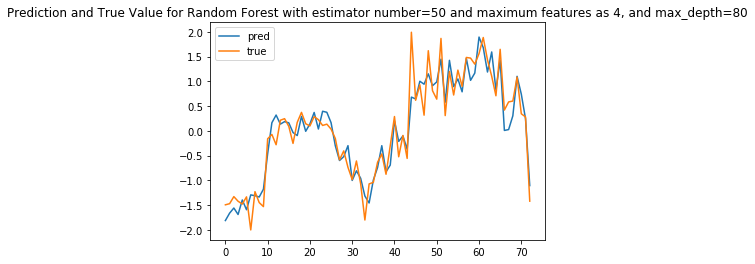

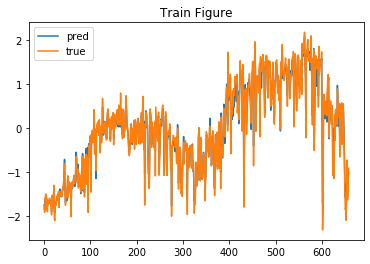

The average RMSE for training is 0.14592709356323688
The average RMSE for validation is 0.38988547408603075
The average OOB of Random Forest model is 0.15309557116286046
When maximum_feature is 7


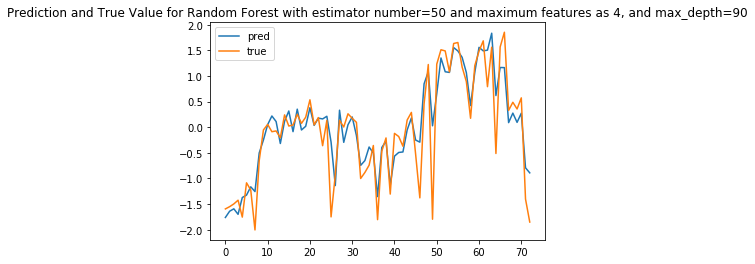

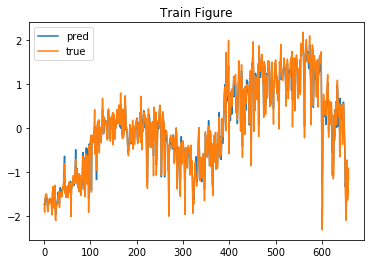

The average RMSE for training is 0.14601395661073535
The average RMSE for validation is 0.38076520961662136
The average OOB of Random Forest model is 0.153311348461816
When maximum_feature is 7


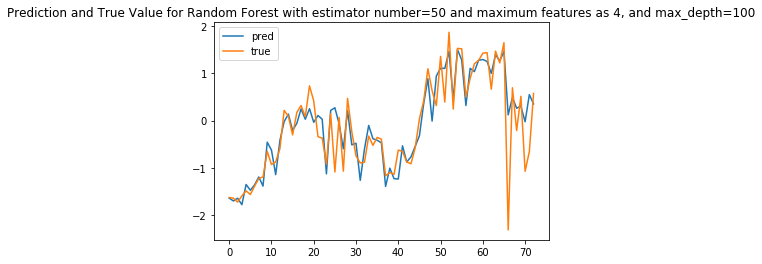

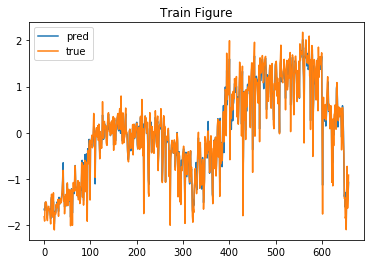

The average RMSE for training is 0.1466260108989355
The average RMSE for validation is 0.38673775851268993
The average OOB of Random Forest model is 0.15420246150456288
When maximum_feature is 7


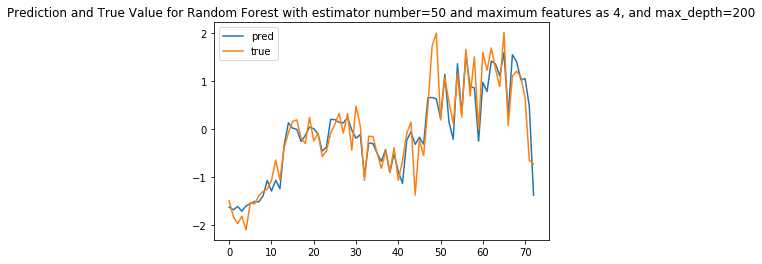

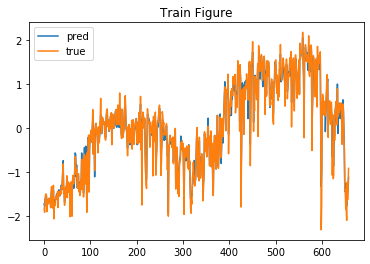

The average RMSE for training is 0.14794140765139457
The average RMSE for validation is 0.3814360318555633
The average OOB of Random Forest model is 0.15640231695782356
When maximum_feature is 7


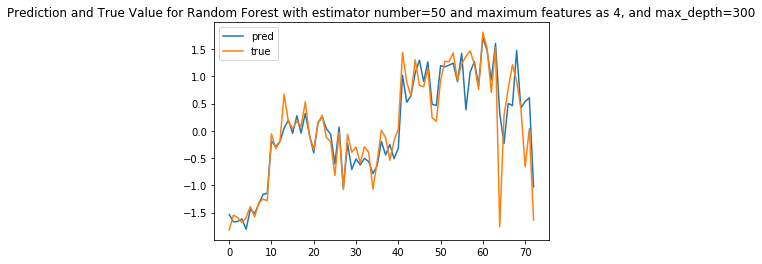

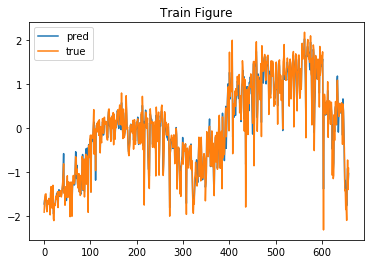

The average RMSE for training is 0.14810232426717904
The average RMSE for validation is 0.3748591454259868
The average OOB of Random Forest model is 0.1562321005763562


Text(0, 0.5, 'RMSE and Error')

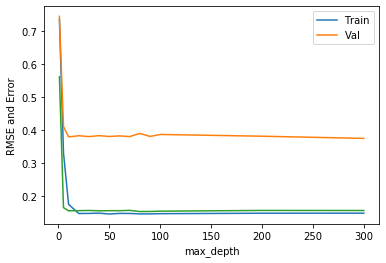

In [135]:
#Maximum Depth
max_depth=[1,5,10,20,30,40,50,60,70,80,90,100,200,300]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for md in max_depth:
    print('When maximum_depth is {}'.format(md))

    RMSE_train_sub,RMSE_val_sub,OOB_sub=    evaluation_randomforest(day_feature_red_withlabel,50,4,md)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
plt.plot(max_depth,RMSE_train)
plt.plot(max_depth,RMSE_val)
plt.plot(max_depth,OOB)
plt.legend(['Train','Val'])
plt.xlabel('max_depth')
plt.ylabel('RMSE and Error')

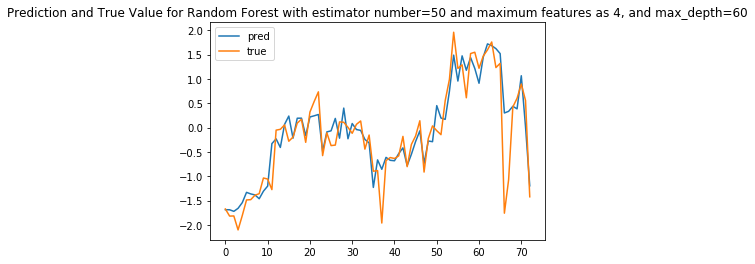

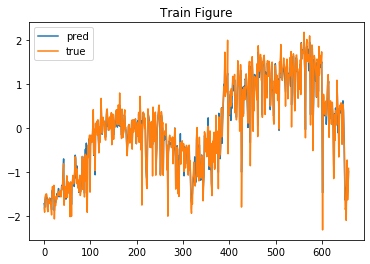

The average RMSE for training is 0.1482746593237909
The average RMSE for validation is 0.3843057124749918
The average OOB of Random Forest model is 0.1565584658166292


In [49]:
#The best configuration evaluation
RMSE_train_sub,RMSE_val_sub,OOB_sub=    evaluation_randomforest(day_feature_red_withlabel,50,4,60)